In [6]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Libraries

import requests
import json
import pandas as pd
from IPython.display import display
import requests
import pandas as pd
import time
import numpy as np
import pandas as pd
import numpy as np
import re

In [8]:

# The code retrieves up to 100 medical device adverse event reports from the FDA's OpenFDA API.
# It prints each event in a JSON formatted string for readability.

import requests
import json
import pandas as pd
from IPython.display import display

# Base URL for the OpenFDA Device Event API
base_url = 'https://api.fda.gov/device/event.json'

# Define parameters
params = {
    'search': '',        # Empty search retrieves all records (subject to limit)
    'limit': '100',      # Max 100 records per request
    'skip': '0'          # For pagination
}

# Make the API request
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Access the results
    events = data.get('results', [])
    print(f'Number of events retrieved: {len(events)}')

    if len(events) > 0:
        # Convert the list of events into a DataFrame
        df = pd.json_normalize(events)
        # Display the first few rows
        display(df.head())
    else:
        print('No events found in the data.')
else:
    print(f'Error: {response.status_code}')



Number of events retrieved: 100


,manufacturer_contact_zip_ext,manufacturer_g1_address_2,event_location,report_to_fda,manufacturer_contact_t_name,manufacturer_contact_state,manufacturer_link_flag,manufacturer_contact_address_2,manufacturer_g1_city,manufacturer_contact_address_1,...,manufacturer_g1_address_1,distributor_zip_code,manufacturer_contact_postal_code,manufacturer_contact_exchange,manufacturer_contact_pcountry,suppl_dates_fda_received,date_report_to_manufacturer,device_date_of_manufacturer,product_problems,date_manufacturer_received
0,,,HOSPITAL,Y,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
1,,,OTHER,Y,,,N,,,,...,,,,,,,19920708,NaN,NaN,NaN
2,,,INVALID DATA,N,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
3,,,HOSPITAL,N,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
4,,,,,,,Y,,,,...,,,,,,12/28/2009,NaN,NaN,NaN,NaN


In [9]:
# Retrieving More Data Using the OpenFDA API in Google Colab
# Retrieving Up to 5,000 Reports or events via the OpenFDA API

import requests
import pandas as pd
import time

# Base URL for the OpenFDA Device Event API
base_url = 'https://api.fda.gov/device/event.json'

# Initialize an empty list to store all events
all_events = []

# Define total records to fetch and batch size
total_records = 5000
batch_size = 100  # Max allowed per request

# Calculate the number of batches needed
num_batches = total_records // batch_size

# Loop through each batch
for i in range(num_batches):
    # Calculate the 'skip' value
    skip = i * batch_size

    # Define parameters for the API request
    params = {
        'search': '',            # Empty search retrieves all records
        'limit': str(batch_size),
        'skip': str(skip)
    }

    # Make the API request
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        events = data.get('results', [])
        all_events.extend(events)
        print(f"Retrieved {len(events)} records. Total records so far: {len(all_events)}")
    else:
        print(f'Error: {response.status_code}')
        break  # Exit the loop if there's an error

    # Add a short delay to avoid hitting rate limits
    time.sleep(0.2)  # 200 milliseconds delay

# Convert the list of events into a DataFrame
df = pd.json_normalize(all_events)

# Display the total number of records retrieved
print(f'\nTotal records retrieved: {len(df)}')

# Display the first few rows
df.head()


Retrieved 100 records. Total records so far: 100
Retrieved 100 records. Total records so far: 200
Retrieved 100 records. Total records so far: 300
Retrieved 100 records. Total records so far: 400
Retrieved 100 records. Total records so far: 500
Retrieved 100 records. Total records so far: 600
Retrieved 100 records. Total records so far: 700
Retrieved 100 records. Total records so far: 800
Retrieved 100 records. Total records so far: 900
Retrieved 100 records. Total records so far: 1000
Retrieved 100 records. Total records so far: 1100
Retrieved 100 records. Total records so far: 1200
Retrieved 100 records. Total records so far: 1300
Retrieved 100 records. Total records so far: 1400
Retrieved 100 records. Total records so far: 1500
Retrieved 100 records. Total records so far: 1600
Retrieved 100 records. Total records so far: 1700
Retrieved 100 records. Total records so far: 1800
Retrieved 100 records. Total records so far: 1900
Retrieved 100 records. Total records so far: 2000
Retrieved

,manufacturer_contact_zip_ext,manufacturer_g1_address_2,event_location,report_to_fda,manufacturer_contact_t_name,manufacturer_contact_state,manufacturer_link_flag,manufacturer_contact_address_2,manufacturer_g1_city,manufacturer_contact_address_1,...,manufacturer_g1_address_1,distributor_zip_code,manufacturer_contact_postal_code,manufacturer_contact_exchange,manufacturer_contact_pcountry,suppl_dates_fda_received,date_report_to_manufacturer,device_date_of_manufacturer,product_problems,date_manufacturer_received
0,,,HOSPITAL,Y,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
1,,,OTHER,Y,,,N,,,,...,,,,,,,19920708,NaN,NaN,NaN
2,,,INVALID DATA,N,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
3,,,HOSPITAL,N,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
4,,,,,,,Y,,,,...,,,,,,12/28/2009,NaN,NaN,NaN,NaN


# Data Exploration

In [10]:
# Display the first few rows
df.head(10)

,manufacturer_contact_zip_ext,manufacturer_g1_address_2,event_location,report_to_fda,manufacturer_contact_t_name,manufacturer_contact_state,manufacturer_link_flag,manufacturer_contact_address_2,manufacturer_g1_city,manufacturer_contact_address_1,...,manufacturer_g1_address_1,distributor_zip_code,manufacturer_contact_postal_code,manufacturer_contact_exchange,manufacturer_contact_pcountry,suppl_dates_fda_received,date_report_to_manufacturer,device_date_of_manufacturer,product_problems,date_manufacturer_received
0,,,HOSPITAL,Y,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
1,,,OTHER,Y,,,N,,,,...,,,,,,,19920708,NaN,NaN,NaN
2,,,INVALID DATA,N,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
3,,,HOSPITAL,N,,,N,,,,...,,,,,,,NaN,NaN,NaN,NaN
4,,,,,,,Y,,,,...,,,,,,12/28/2009,NaN,NaN,NaN,NaN
5,-386,,,,,,Y,,JUNCOS,CEIBA NORTE IND. PARK #50 ROAD,...,CEIBA NORTE IND. PARK #50 ROAD,,00777-3869,818,,05/08/2022,NaN,20180927,"[No Apparent Adverse Event, Patient Device Int...",20200423
6,-386,,I,*,,,Y,,JUNCOS,CEIBA NORTE IND. PARK #50 ROAD,...,CEIBA NORTE IND. PARK #50 ROAD,,00777-3869,818,,,NaN,20170709,[Device Difficult to Program or Calibrate],20200422
7,-386,,,,,,Y,,JUNCOS,CEIBA NORTE IND. PARK #50 ROAD,...,CEIBA NORTE IND. PARK #50 ROAD,,00777-3869,818,,05/08/2022,NaN,20190124,[Patient Device Interaction Problem],20200423
8,-386,,,,,,Y,,JUNCOS,CEIBA NORTE IND. PARK #50 ROAD,...,CEIBA NORTE IND. PARK #50 ROAD,,00777-3869,818,,05/08/2022,NaN,20180911,[Patient Device Interaction Problem],20200423
9,-386,,,,,,Y,,JUNCOS,CEIBA NORTE IND. PARK #50 ROAD,...,CEIBA NORTE IND. PARK #50 ROAD,,00777-3869,818,,05/08/2022,NaN,20180621,[Adverse Event Without Identified Device or Us...,20200423


In [11]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 88 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   manufacturer_contact_zip_ext       5000 non-null   object
 1   manufacturer_g1_address_2          5000 non-null   object
 2   event_location                     5000 non-null   object
 3   report_to_fda                      5000 non-null   object
 4   manufacturer_contact_t_name        5000 non-null   object
 5   manufacturer_contact_state         5000 non-null   object
 6   manufacturer_link_flag             5000 non-null   object
 7   manufacturer_contact_address_2     5000 non-null   object
 8   manufacturer_g1_city               5000 non-null   object
 9   manufacturer_contact_address_1     5000 non-null   object
 10  manufacturer_contact_pcity         5000 non-null   object
 11  event_type                         5000 non-null   object
 12  report

In [12]:
# Checking for empty strings in a column
(df['manufacturer_contact_zip_ext'] == '').sum()


4012

In [13]:
# Creating a list of all the placeholder strings that should be considered as missing values

import pandas as pd
import numpy as np

# List of placeholder values that represent missing data
missing_values = ['', ' ', 'N/A', 'NA', 'n/a', 'na', 'NULL', 'null', 'NaN', 'NaT', 'nan', 'Unknown', 'unknown', 'NONE', 'none']


In [14]:
# Replacing Placeholders with NaN
df.replace(missing_values, np.nan, inplace=True)


<ipython-input-14-5296b3dce1c9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(missing_values, np.nan, inplace=True)


In [15]:
# Verifying the changes

# Get the count of missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)

manufacturer_contact_zip_ext    4012
manufacturer_g1_address_2       4534
event_location                   737
report_to_fda                    744
manufacturer_contact_t_name     4038
                                ... 
suppl_dates_fda_received        2714
date_report_to_manufacturer     4863
device_date_of_manufacturer     2549
product_problems                 487
date_manufacturer_received       268
Length: 88, dtype: int64


In [16]:
# Re-examining the DataFrame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 88 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   manufacturer_contact_zip_ext       988 non-null    object 
 1   manufacturer_g1_address_2          466 non-null    object 
 2   event_location                     4263 non-null   object 
 3   report_to_fda                      4256 non-null   object 
 4   manufacturer_contact_t_name        962 non-null    object 
 5   manufacturer_contact_state         2591 non-null   object 
 6   manufacturer_link_flag             5000 non-null   object 
 7   manufacturer_contact_address_2     152 non-null    object 
 8   manufacturer_g1_city               2397 non-null   object 
 9   manufacturer_contact_address_1     2963 non-null   object 
 10  manufacturer_contact_pcity         3364 non-null   object 
 11  event_type                         5000 non-null   objec

In [17]:
# Assess Missing Data in Critical Columns

# Calculate Missing Data Percentage
missing_percent = (df.isnull().sum() / len(df)) * 100

# Adjust display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# view the full missing data percentages
print(missing_percent)

manufacturer_contact_zip_ext          80.24
manufacturer_g1_address_2             90.68
event_location                        14.74
report_to_fda                         14.88
manufacturer_contact_t_name           80.76
manufacturer_contact_state            48.18
manufacturer_link_flag                 0.00
manufacturer_contact_address_2        96.96
manufacturer_g1_city                  52.06
manufacturer_contact_address_1        40.74
manufacturer_contact_pcity            32.72
event_type                             0.00
report_number                          0.00
type_of_report                         0.00
product_problem_flag                   0.86
date_received                          0.00
manufacturer_address_2               100.00
pma_pmn_number                        31.64
date_of_event                         15.78
reprocessed_and_reused_flag            1.34
manufacturer_address_1               100.00
report_date                           96.50
exemption_number                

In [18]:
# Showing all missing data percentages without truncation and sorted from highest to lowest

# Sort missing_percent in descending order
print(missing_percent.sort_values(ascending=False))

manufacturer_zip_code_ext            100.00
distributor_state                    100.00
number_patients_in_event             100.00
distributor_zip_code_ext             100.00
manufacturer_zip_code                100.00
manufacturer_country                 100.00
distributor_zip_code                 100.00
exemption_number                     100.00
manufacturer_address_1               100.00
manufacturer_city                    100.00
distributor_city                     100.00
manufacturer_postal_code             100.00
distributor_name                     100.00
manufacturer_address_2               100.00
event_key                            100.00
report_to_manufacturer               100.00
distributor_address_2                100.00
distributor_address_1                100.00
number_devices_in_event              100.00
manufacturer_state                   100.00
manufacturer_name                    100.00
manufacturer_contact_extension        99.88
date_report_to_fda              

##### Observation:
- Several columns have 100% missing data which is not helpful
- Many columns have over 50% missing data
- A few columns have moderate and low missing data
- Very few had no missing data

Based on our goal to identify trends, patterns, and potential areas of concern related to medical device safety, some relevnat columns might be "event_type, product_problems, device, date_received, date_of_event, etc"

##### Limitations:
- Many columns related to manufacturers and distributors have high missing data percentages. This limits the ability to analyze data by manufacturer.
- Also, device specific device details may be incomplete or inconsistent.


In [19]:
# Identifying Nested Columns in the DataFrame
# Check data types of all columns

# Loop through each column in the DataFrame
for col in df.columns:
    # Create a temporary Series without NaN values
    non_null_series = df[col].dropna()

    # Check if the Series is not empty
    if not non_null_series.empty:
        # Access the first non-null entry
        first_entry = non_null_series.iloc[0]
        # Print the column name and data type of the first entry
        print(f"Column: {col}, Data Type: {type(first_entry)}")
    else:
        # Handle the case where the column is empty after dropping NaNs
        print(f"Column: {col} is empty after dropping NaNs.")


Column: manufacturer_contact_zip_ext, Data Type: <class 'str'>
Column: manufacturer_g1_address_2, Data Type: <class 'str'>
Column: event_location, Data Type: <class 'str'>
Column: report_to_fda, Data Type: <class 'str'>
Column: manufacturer_contact_t_name, Data Type: <class 'str'>
Column: manufacturer_contact_state, Data Type: <class 'str'>
Column: manufacturer_link_flag, Data Type: <class 'str'>
Column: manufacturer_contact_address_2, Data Type: <class 'str'>
Column: manufacturer_g1_city, Data Type: <class 'str'>
Column: manufacturer_contact_address_1, Data Type: <class 'str'>
Column: manufacturer_contact_pcity, Data Type: <class 'str'>
Column: event_type, Data Type: <class 'str'>
Column: report_number, Data Type: <class 'str'>
Column: type_of_report, Data Type: <class 'list'>
Column: product_problem_flag, Data Type: <class 'str'>
Column: date_received, Data Type: <class 'str'>
Column: manufacturer_address_2 is empty after dropping NaNs.
Column: pma_pmn_number, Data Type: <class 'str'

In [20]:
# Identify Columns with Nested data

# Lists to store columns with nested data
nested_columns = []

# Loop through each column in the DataFrame
for col in df.columns:
    # Get the first non-null value in the column
    non_null_series = df[col].dropna()

    if not non_null_series.empty:
        first_entry = non_null_series.iloc[0]
        # Check if the entry is a list or dict
        if isinstance(first_entry, (list, dict)):
            nested_columns.append(col)
            print(f"Column: {col}, Data Type: {type(first_entry)}")
    else:
        print(f"Column: {col} is empty after dropping NaNs.")


Column: type_of_report, Data Type: <class 'list'>
Column: manufacturer_address_2 is empty after dropping NaNs.
Column: manufacturer_address_1 is empty after dropping NaNs.
Column: exemption_number is empty after dropping NaNs.
Column: source_type, Data Type: <class 'list'>
Column: distributor_zip_code_ext is empty after dropping NaNs.
Column: device, Data Type: <class 'list'>
Column: manufacturer_zip_code is empty after dropping NaNs.
Column: manufacturer_city is empty after dropping NaNs.
Column: patient, Data Type: <class 'list'>
Column: distributor_city is empty after dropping NaNs.
Column: distributor_state is empty after dropping NaNs.
Column: event_key is empty after dropping NaNs.
Column: number_devices_in_event is empty after dropping NaNs.
Column: manufacturer_name is empty after dropping NaNs.
Column: remedial_action, Data Type: <class 'list'>
Column: report_to_manufacturer is empty after dropping NaNs.
Column: manufacturer_zip_code_ext is empty after dropping NaNs.
Column: d

##### Observation
If its a 'list' or 'dict', we consider it nested data.

In [21]:
# Viewing the List of Nested Columns

print("\nColumns with nested data:")
print(nested_columns)


Columns with nested data:
['type_of_report', 'source_type', 'device', 'patient', 'remedial_action', 'mdr_text', 'product_problems']


In [22]:
# Analyzing the Data Types in the Nested Columns

for col in nested_columns:
    print(f"\nAnalyzing column: {col}")
    types_in_col = df[col].dropna().apply(type).value_counts()
    print(f"Data types in column '{col}':")
    print(types_in_col)



Analyzing column: type_of_report
Data types in column 'type_of_report':
type_of_report
<class 'list'>    5000
Name: count, dtype: int64

Analyzing column: source_type
Data types in column 'source_type':
source_type
<class 'list'>    5000
Name: count, dtype: int64

Analyzing column: device
Data types in column 'device':
device
<class 'list'>    5000
Name: count, dtype: int64

Analyzing column: patient
Data types in column 'patient':
patient
<class 'list'>    5000
Name: count, dtype: int64

Analyzing column: remedial_action
Data types in column 'remedial_action':
remedial_action
<class 'list'>    5000
Name: count, dtype: int64

Analyzing column: mdr_text
Data types in column 'mdr_text':
mdr_text
<class 'list'>    5000
Name: count, dtype: int64

Analyzing column: product_problems
Data types in column 'product_problems':
product_problems
<class 'list'>    4513
Name: count, dtype: int64


In [23]:
# Checking the Contents of the Lists/ Types of Elements inside the lists

# Function to check the type of elements inside the lists
def check_list_contents(column_name):
    # Get the first non-null entry
    non_null_series = df[column_name].dropna()
    if non_null_series.empty:
        print(f"Column '{column_name}' is empty after dropping NaNs.")
        return
    first_entry = non_null_series.iloc[0]
    # Ensure the entry is a list
    if isinstance(first_entry, list):
        if not first_entry:
            print(f"Column '{column_name}' contains empty lists.")
            return
        first_element = first_entry[0]
        print(f"Column '{column_name}' contains lists of type: {type(first_element)}")
        # Optionally, print the first few entries
        print(f"Sample data from '{column_name}':")
        print(first_entry)
    else:
        print(f"Column '{column_name}' entries are not lists.")

# Check each nested column
for col in nested_columns:
    check_list_contents(col)

Column 'type_of_report' contains lists of type: <class 'str'>
Sample data from 'type_of_report':
['Initial submission']
Column 'source_type' contains lists of type: <class 'str'>
Sample data from 'source_type':
['']
Column 'device' contains lists of type: <class 'dict'>
Sample data from 'device':
[{'device_event_key': '8', 'implant_flag': 'N', 'date_removed_flag': '', 'device_sequence_number': '1', 'date_received': '19920310', 'brand_name': 'N/A', 'generic_name': 'MANUAL HOSPITAL BED', 'manufacturer_d_name': 'SCI-O-TECH/GOODMAN', 'manufacturer_d_address_1': '', 'manufacturer_d_address_2': '', 'manufacturer_d_city': '', 'manufacturer_d_state': '', 'manufacturer_d_zip_code': '', 'manufacturer_d_zip_code_ext': '', 'manufacturer_d_country': '', 'manufacturer_d_postal_code': '', 'model_number': '720', 'catalog_number': 'N/A', 'lot_number': 'N/A', 'other_id_number': 'N/A', 'device_operator': 'OTHER CAREGIVERS', 'device_availability': 'Yes', 'device_report_product_code': 'FNJ', 'device_age_te

##### Observation:
- **Columns with Lists of Strings**:

'type_of_report' (e.g., ['Initial submission'])

'source_type' (e.g., [''])

'remedial_action' (e.g., [''])

'product_problems' (e.g., ['No Apparent Adverse Event', 'Patient Device Interaction Problem'])

- **Columns with Lists of Dictionaries**:

'device' (contains detailed device information)

'patient' (contains patient details)

'mdr_text' (contains narrative text about the event)

In [24]:
# Checking if a Unique Identifier Exists in the dataframe

# Check if 'report_number' is unique
if df['report_number'].is_unique:
    df['unique_id'] = df['report_number']
else:
    # If 'report_number' is not unique, create a new unique ID
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'unique_id'}, inplace=True)

In [25]:
# Checking if all values in 'report_number' column are unique

is_unique = df['report_number'].is_unique
print(f"'report_number' is unique: {is_unique}")


'report_number' is unique: True


In [26]:
# Assigning 'report_number' to 'unique_id'
df['unique_id'] = df['report_number']

In [27]:
df.head()

,manufacturer_contact_zip_ext,manufacturer_g1_address_2,event_location,report_to_fda,manufacturer_contact_t_name,manufacturer_contact_state,manufacturer_link_flag,manufacturer_contact_address_2,manufacturer_g1_city,manufacturer_contact_address_1,manufacturer_contact_pcity,event_type,report_number,type_of_report,product_problem_flag,date_received,manufacturer_address_2,pma_pmn_number,date_of_event,reprocessed_and_reused_flag,manufacturer_address_1,report_date,exemption_number,manufacturer_contact_zip_code,reporter_occupation_code,manufacturer_contact_plocal,noe_summarized,manufacturer_contact_l_name,source_type,distributor_zip_code_ext,manufacturer_g1_postal_code,date_facility_aware,manufacturer_g1_state,reporter_country_code,manufacturer_contact_area_code,date_added,manufacturer_contact_f_name,previous_use_code,device,manufacturer_zip_code,suppl_dates_mfr_received,manufacturer_contact_country,date_changed,health_professional,summary_report_flag,manufacturer_g1_zip_code_ext,manufacturer_contact_extension,manufacturer_city,manufacturer_contact_phone_number,patient,distributor_city,date_report,initial_report_to_fda,distributor_state,event_key,manufacturer_g1_country,manufacturer_contact_city,mdr_report_key,removal_correction_number,number_devices_in_event,date_report_to_fda,manufacturer_name,report_source_code,remedial_action,manufacturer_g1_zip_code,report_to_manufacturer,manufacturer_zip_code_ext,manufacturer_g1_name,adverse_event_flag,distributor_address_1,manufacturer_state,distributor_address_2,manufacturer_postal_code,single_use_flag,manufacturer_country,mdr_text,number_patients_in_event,distributor_name,manufacturer_g1_address_1,distributor_zip_code,manufacturer_contact_postal_code,manufacturer_contact_exchange,manufacturer_contact_pcountry,suppl_dates_fda_received,date_report_to_manufacturer,device_date_of_manufacturer,product_problems,date_manufacturer_received,unique_id
0,NaN,NaN,HOSPITAL,Y,NaN,NaN,N,NaN,NaN,NaN,NaN,Injury,10,[Initial submission],N,19920310,NaN,NaN,19920220,NaN,NaN,19920221,NaN,NaN,NaN,NaN,1,NaN,[],NaN,NaN,19920220,NaN,NaN,NaN,19920319,NaN,NaN,"[{'device_event_key': '8', 'implant_flag': 'N'...",NaN,NaN,NaN,20200623,NaN,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv...",NaN,19920221,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,19920221,NaN,User Facility report,[],NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,"[{'mdr_text_key': '3', 'text_type_code': 'Desc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,NaN,NaN,OTHER,Y,NaN,NaN,N,NaN,NaN,NaN,NaN,Injury,2243621-1992-00036,[Initial submission],N,19920722,NaN,NaN,19920629,NaN,NaN,19920708,NaN,NaN,UNKNOWN,NaN,1,NaN,[],NaN,NaN,19920629,NaN,US,NaN,19920803,NaN,NaN,"[{'device_event_key': '956', 'implant_flag': '...",NaN,NaN,NaN,19920803,U,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv...",NaN,19920708,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaN,19920708,NaN,Distributor report,[],NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,"[{'mdr_text_key': '614', 'text_type_code': 'De...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19920708,NaN,NaN,NaN,2243621-1992-00036
2,NaN,NaN,INVALID DATA,N,NaN,NaN,N,NaN,NaN,NaN,NaN,No answer provided,10000,[Initial submission],*,19940805,NaN,NaN,NaN,NaN,NaN,19940728,NaN,NaN,NaN,NaN,1,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,19950306,NaN,NaN,"[{'device_event_key': '9652', 'implant_flag': ...",NaN,NaN,NaN,19950306,NaN,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv...",NaN,19940728,NaN,NaN,NaN,NaN,NaN,10000,NaN,NaN,NaN,NaN,User Facility report,[],NaN,NaN,NaN,NaN,*,NaN,NaN,NaN,NaN,NaN,NaN,"[{'mdr_text_key': '5377', 'text_type_code': 'D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000
3,NaN,NaN,HOSPITAL,N,NaN,NaN,N,NaN,NaN,NaN,NaN,Injury,100000,[Initial submission],Y,19970619,NaN,NaN,19970428,NaN,NaN,19970509,NaN,NaN,PHYSICIAN,NaN,1,NaN,[],NaN,NaN,19970428,NaN,US,NaN,19970625,NaN,NaN,"[{'device_event_key': '98520', 'implant_flag':...",NaN,NaN,NaN,19970625,Y,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv.

###### **Exploding Columns with Lists of Strings**
Columns to Explode:

'product_problems',
'type_of_report',
'source_type',
'remedial_action'

In [28]:
# Exploding the Lists of Strings While Keeping the Identifier
# Exploding these 4 columns will put the elements in the lists in a seperate row.

#Columns to Explode:'product_problems', 'type_of_report', 'source_type', 'remedial_action'

# Exploding 'product_problems' while keeping 'unique_id'
df_pp = df[['unique_id', 'product_problems']].explode('product_problems')
df_pp.reset_index(drop=True, inplace=True)

In [29]:
# Exploing 'type_of_report'
df_tor = df[['unique_id', 'type_of_report']].explode('type_of_report')
df_tor.reset_index(drop=True, inplace=True)

In [30]:
# Exploding 'source_type'
df_st = df[['unique_id', 'source_type']].explode('source_type')
df_st.reset_index(drop=True, inplace=True)

In [31]:
# Exploding 'remedial_action'
df_ra = df[['unique_id', 'remedial_action']].explode('remedial_action')
df_ra.reset_index(drop=True, inplace=True)

In [32]:
df['remedial_action'].value_counts()

,count
remedial_action,
[],4426
[Recall],386
[Other],103
[Notification],63
[Inspection],14
[Replace],5
[Relabeling],1
[Modification/Adjustment],1
[Repair],1


##### **Exploding and Normalizing Columns with Lists of Dictionaries**
Columns to Explode and Normalize:

'device',
'patient',
'mdr_text'

In [33]:
df.head(7)

,manufacturer_contact_zip_ext,manufacturer_g1_address_2,event_location,report_to_fda,manufacturer_contact_t_name,manufacturer_contact_state,manufacturer_link_flag,manufacturer_contact_address_2,manufacturer_g1_city,manufacturer_contact_address_1,manufacturer_contact_pcity,event_type,report_number,type_of_report,product_problem_flag,date_received,manufacturer_address_2,pma_pmn_number,date_of_event,reprocessed_and_reused_flag,manufacturer_address_1,report_date,exemption_number,manufacturer_contact_zip_code,reporter_occupation_code,manufacturer_contact_plocal,noe_summarized,manufacturer_contact_l_name,source_type,distributor_zip_code_ext,manufacturer_g1_postal_code,date_facility_aware,manufacturer_g1_state,reporter_country_code,manufacturer_contact_area_code,date_added,manufacturer_contact_f_name,previous_use_code,device,manufacturer_zip_code,suppl_dates_mfr_received,manufacturer_contact_country,date_changed,health_professional,summary_report_flag,manufacturer_g1_zip_code_ext,manufacturer_contact_extension,manufacturer_city,manufacturer_contact_phone_number,patient,distributor_city,date_report,initial_report_to_fda,distributor_state,event_key,manufacturer_g1_country,manufacturer_contact_city,mdr_report_key,removal_correction_number,number_devices_in_event,date_report_to_fda,manufacturer_name,report_source_code,remedial_action,manufacturer_g1_zip_code,report_to_manufacturer,manufacturer_zip_code_ext,manufacturer_g1_name,adverse_event_flag,distributor_address_1,manufacturer_state,distributor_address_2,manufacturer_postal_code,single_use_flag,manufacturer_country,mdr_text,number_patients_in_event,distributor_name,manufacturer_g1_address_1,distributor_zip_code,manufacturer_contact_postal_code,manufacturer_contact_exchange,manufacturer_contact_pcountry,suppl_dates_fda_received,date_report_to_manufacturer,device_date_of_manufacturer,product_problems,date_manufacturer_received,unique_id
0,NaN,NaN,HOSPITAL,Y,NaN,NaN,N,NaN,NaN,NaN,NaN,Injury,10,[Initial submission],N,19920310,NaN,NaN,19920220,NaN,NaN,19920221,NaN,NaN,NaN,NaN,1,NaN,[],NaN,NaN,19920220,NaN,NaN,NaN,19920319,NaN,NaN,"[{'device_event_key': '8', 'implant_flag': 'N'...",NaN,NaN,NaN,20200623,NaN,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv...",NaN,19920221,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,19920221,NaN,User Facility report,[],NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,"[{'mdr_text_key': '3', 'text_type_code': 'Desc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,NaN,NaN,OTHER,Y,NaN,NaN,N,NaN,NaN,NaN,NaN,Injury,2243621-1992-00036,[Initial submission],N,19920722,NaN,NaN,19920629,NaN,NaN,19920708,NaN,NaN,UNKNOWN,NaN,1,NaN,[],NaN,NaN,19920629,NaN,US,NaN,19920803,NaN,NaN,"[{'device_event_key': '956', 'implant_flag': '...",NaN,NaN,NaN,19920803,U,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv...",NaN,19920708,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaN,19920708,NaN,Distributor report,[],NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,"[{'mdr_text_key': '614', 'text_type_code': 'De...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19920708,NaN,NaN,NaN,2243621-1992-00036
2,NaN,NaN,INVALID DATA,N,NaN,NaN,N,NaN,NaN,NaN,NaN,No answer provided,10000,[Initial submission],*,19940805,NaN,NaN,NaN,NaN,NaN,19940728,NaN,NaN,NaN,NaN,1,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,19950306,NaN,NaN,"[{'device_event_key': '9652', 'implant_flag': ...",NaN,NaN,NaN,19950306,NaN,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv...",NaN,19940728,NaN,NaN,NaN,NaN,NaN,10000,NaN,NaN,NaN,NaN,User Facility report,[],NaN,NaN,NaN,NaN,*,NaN,NaN,NaN,NaN,NaN,NaN,"[{'mdr_text_key': '5377', 'text_type_code': 'D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000
3,NaN,NaN,HOSPITAL,N,NaN,NaN,N,NaN,NaN,NaN,NaN,Injury,100000,[Initial submission],Y,19970619,NaN,NaN,19970428,NaN,NaN,19970509,NaN,NaN,PHYSICIAN,NaN,1,NaN,[],NaN,NaN,19970428,NaN,US,NaN,19970625,NaN,NaN,"[{'device_event_key': '98520', 'implant_flag':...",NaN,NaN,NaN,19970625,Y,N,NaN,NaN,NaN,NaN,"[{'patient_sequence_number': '1', 'date_receiv.

##### Exploding and Normalizing 'device' column

In [34]:
# For 'device' column

# Select 'unique_id' and 'device' columns
df_device = df[['unique_id', 'device']].copy()

In [35]:
# verifying

print("Step 1: df_device.head()")
print(df_device.head())

Step 1: df_device.head()
            unique_id                                             device
0                  10  [{'device_event_key': '8', 'implant_flag': 'N'...
1  2243621-1992-00036  [{'device_event_key': '956', 'implant_flag': '...
2               10000  [{'device_event_key': '9652', 'implant_flag': ...
3              100000  [{'device_event_key': '98520', 'implant_flag':...
4  2919069-2008-00381  [{'device_event_key': '', 'implant_flag': '', ...


In [36]:
# Explode the 'device' column
df_device_exploded = df_device.explode('device')

In [37]:
# Verifying

print("\nStep 2: df_device_exploded.head()")
print(df_device_exploded.head())


Step 2: df_device_exploded.head()
            unique_id                                             device
0                  10  {'device_event_key': '8', 'implant_flag': 'N',...
1  2243621-1992-00036  {'device_event_key': '956', 'implant_flag': 'N...
2               10000  {'device_event_key': '9652', 'implant_flag': '...
3              100000  {'device_event_key': '98520', 'implant_flag': ...
4  2919069-2008-00381  {'device_event_key': '', 'implant_flag': '', '...


##### Observation
The explode operation has transformed each list of dictionaries into individual dictionaries, effectively expanding the data.

In [38]:
# Checking the datatypes of the 'device' colum before and after exploding

# Before exploding
print("Data types in 'device' column before exploding:")
print(df_device['device'].apply(type).value_counts())

# After exploding
print("\nData types in 'device' column after exploding:")
print(df_device_exploded['device'].apply(type).value_counts())

Data types in 'device' column before exploding:
device
<class 'list'>    5000
Name: count, dtype: int64

Data types in 'device' column after exploding:
device
<class 'dict'>    5014
Name: count, dtype: int64


In [39]:
# Reset the index
df_device_exploded.reset_index(drop=True, inplace=True)

In [40]:
# Verifying if it did reset.
# The index should be reset to range from 0 upwards
print("\nStep 3: After resetting index, df_device_exploded.head()")
print(df_device_exploded.head())


Step 3: After resetting index, df_device_exploded.head()
            unique_id                                             device
0                  10  {'device_event_key': '8', 'implant_flag': 'N',...
1  2243621-1992-00036  {'device_event_key': '956', 'implant_flag': 'N...
2               10000  {'device_event_key': '9652', 'implant_flag': '...
3              100000  {'device_event_key': '98520', 'implant_flag': ...
4  2919069-2008-00381  {'device_event_key': '', 'implant_flag': '', '...


In [41]:
# Normalize the 'device' column
device_normalized = pd.json_normalize(df_device_exploded['device'])

In [42]:
# Verying
# It should show dataFrame where each key in the device dictionaries becomes a column and will see columns like 'brand_name', 'generic_name'

print("\nStep 4: device_normalized.head()")
print(device_normalized.head(3))


Step 4: device_normalized.head()
  device_event_key implant_flag date_removed_flag device_sequence_number  \
0                8            N                                        1   
1              956            N                                        1   
2             9652            *                                        1   

  date_received        brand_name         generic_name  \
0      19920310               N/A  MANUAL HOSPITAL BED   
1      19920722     SAME AS ABOVE             DIALYZER   
2      19940805  TRANSFER CHAMBER                        

            manufacturer_d_name manufacturer_d_address_1  \
0            SCI-O-TECH/GOODMAN                            
1  GAMBRO PLATE LUNDIA DIALYZER                            
2                     SIM/INTEC                            

  manufacturer_d_address_2 manufacturer_d_city manufacturer_d_state  \
0                                                                     
1                                            

In [43]:
# Prefix the column names
device_normalized.columns = [f"device.{col}" for col in device_normalized.columns]

In [44]:
# Verying to make sure column names are prefized with 'device'

print("\nStep 5: device_normalized.columns")
print(device_normalized.columns)


Step 5: device_normalized.columns
Index(['device.device_event_key', 'device.implant_flag',
       'device.date_removed_flag', 'device.device_sequence_number',
       'device.date_received', 'device.brand_name', 'device.generic_name',
       'device.manufacturer_d_name', 'device.manufacturer_d_address_1',
       'device.manufacturer_d_address_2', 'device.manufacturer_d_city',
       'device.manufacturer_d_state', 'device.manufacturer_d_zip_code',
       'device.manufacturer_d_zip_code_ext', 'device.manufacturer_d_country',
       'device.manufacturer_d_postal_code', 'device.model_number',
       'device.catalog_number', 'device.lot_number', 'device.other_id_number',
       'device.device_operator', 'device.device_availability',
       'device.device_report_product_code', 'device.device_age_text',
       'device.device_evaluated_by_manufacturer',
       'device.baseline_510_k__flag', 'device.baseline_510_k__number',
       'device.baseline_510_k__exempt_flag', 'device.openfda.device_nam

In [45]:
# Combining 'unique_id' with normalized data for 'device'
df_device_flattened = pd.concat([df_device_exploded[['unique_id']], device_normalized], axis=1)

In [46]:
# verifying the flattened device column

print("\nStep 6: df_device_flattened.head()")
print(df_device_flattened.head(2))


Step 6: df_device_flattened.head()
            unique_id device.device_event_key device.implant_flag  \
0                  10                       8                   N   
1  2243621-1992-00036                     956                   N   

  device.date_removed_flag device.device_sequence_number device.date_received  \
0                                                      1             19920310   
1                                                      1             19920722   

  device.brand_name  device.generic_name    device.manufacturer_d_name  \
0               N/A  MANUAL HOSPITAL BED            SCI-O-TECH/GOODMAN   
1     SAME AS ABOVE             DIALYZER  GAMBRO PLATE LUNDIA DIALYZER   

  device.manufacturer_d_address_1 device.manufacturer_d_address_2  \
0                                                                   
1                                                                   

  device.manufacturer_d_city device.manufacturer_d_state  \
0                    

In [47]:
df_device_flattened.head()

,unique_id,device.device_event_key,device.implant_flag,device.date_removed_flag,device.device_sequence_number,device.date_received,device.brand_name,device.generic_name,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_address_2,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_zip_code_ext,device.manufacturer_d_country,device.manufacturer_d_postal_code,device.model_number,device.catalog_number,device.lot_number,device.other_id_number,device.device_operator,device.device_availability,device.device_report_product_code,device.device_age_text,device.device_evaluated_by_manufacturer,device.baseline_510_k__flag,device.baseline_510_k__number,device.baseline_510_k__exempt_flag,device.openfda.device_name,device.openfda.medical_specialty_description,device.openfda.regulation_number,device.openfda.device_class,device.date_returned_to_manufacturer,device.combination_product_flag,device.udi_di,device.udi_public,device.openfda.registration_number,device.openfda.fei_number,device.expiration_date_of_device
0,10,8,N,,1,19920310,N/A,MANUAL HOSPITAL BED,SCI-O-TECH/GOODMAN,,,,,,,,,720,N/A,N/A,N/A,OTHER CAREGIVERS,Yes,FNJ,,,,,,"Bed, Manual",General Hospital,880.5120,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243621-1992-00036,956,N,,1,19920722,SAME AS ABOVE,DIALYZER,GAMBRO PLATE LUNDIA DIALYZER,,,,,,,,,N/A,01-2114,2-0515-11,,OTHER,No,KDI,,,,,,"Dialyzer, High Permeability With Or Without Se...","Gastroenterology, Urology",876.5860,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,9652,*,,1,19940805,TRANSFER CHAMBER,,SIM/INTEC,,,,,,,,,,9000,8382 (SUSPECT MORE THAN 1 LOT#,,INVALID DATA,No answer provided,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000,98520,N,*,1,19970619,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,"VITAL SIGNS, INC.",20 CAMPUS RD.,,TOTOWA,NJ,07512,,US,,*,*,0444,PRODUCT #5020 FAM,HEALTH PROFESSIONAL,Device was returned to manufacturer,CAI,NA,,Y,K862003,N,"Circuit, Breathing (W Connector, Adaptor, Y Pi...",Anesthesiology,868.5240,1,19970509,NaN,NaN,NaN,NaN,NaN,NaN
4,2919069-2008-00381,,,,1,20080220,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,,SANTA CLARA,CA,95054,,US,95054,NA,8H00-01,NA,NA,OTHER,Yes,GKZ,DA,Y,NaN,NaN,NaN,"Counter, Differential Cell",Hematology,864.5220,2,NaN,N,,,[2919069],[2919069],NaN


##### Exploding and Normalizing 'patient' column

In [48]:
# For 'patient' column

# Select 'unique_id' and 'patient' columns
df_patient = df[['unique_id', 'patient']].copy()

In [49]:
# Explode the 'patient' column
df_patient_exploded = df_patient.explode('patient')

In [50]:
# Reset the index
df_patient_exploded.reset_index(drop=True, inplace=True)

In [51]:
# Normalize the 'patient' column
patient_normalized = pd.json_normalize(df_patient_exploded['patient'])

In [52]:
# Prefix the column names
patient_normalized.columns = [f"patient.{col}" for col in patient_normalized.columns]

In [53]:
# Combining 'unique_id' with normalized data for 'patient'
df_patient_flattened = pd.concat([df_patient_exploded[['unique_id']], patient_normalized], axis=1)

In [54]:
df_patient_flattened.head()

,unique_id,patient.patient_sequence_number,patient.date_received,patient.sequence_number_treatment,patient.sequence_number_outcome,patient.patient_age,patient.patient_sex,patient.patient_weight,patient.patient_ethnicity,patient.patient_race,patient.patient_problems
0,10,1,19920310,[],[Required Intervention],92 YR,,,,,NaN
1,2243621-1992-00036,1,19920722,[],[Other],,,,,,NaN
2,10000,1,19940805,[],[Invalid Data],,,,,,NaN
3,100000,1,19970619,[],[Required Intervention],27 YR,,82,,,NaN
4,2919069-2008-00381,1,20080220,"[LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN...",[],NI,,,,,NaN


##### Exploding and Normalizing 'mdr_text' column

In [55]:
# For 'mdr_text' column

# Select 'unique_id' and 'mdr_text' columns
df_mdr_text = df[['unique_id', 'mdr_text']].copy()

In [56]:
# Explode the 'mdr_text' column
df_mdr_text_exploded = df_mdr_text.explode('mdr_text')

In [57]:
# Reset the index
df_mdr_text_exploded.reset_index(drop=True, inplace=True)

In [58]:
# Normalize the 'mdr_text' column
mdr_text_normalized = pd.json_normalize(df_mdr_text_exploded['mdr_text'])

In [59]:
# Prefix the column names
mdr_text_normalized.columns = [f"mdr_text.{col}" for col in mdr_text_normalized.columns]

In [60]:
# Combining 'unique_id' with normalized data for 'mdr_text'
df_mdr_text_flattened = pd.concat([df_mdr_text_exploded[['unique_id']], mdr_text_normalized], axis=1)

In [61]:
df_mdr_text_flattened.head()

,unique_id,mdr_text.mdr_text_key,mdr_text.text_type_code,mdr_text.patient_sequence_number,mdr_text.text
0,10,3,Description of Event or Problem,1,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,614,Description of Event or Problem,1,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,5377,Description of Event or Problem,1,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,21392769,Description of Event or Problem,1,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,788224,Description of Event or Problem,1,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...


In [62]:
df.columns

Index(['manufacturer_contact_zip_ext', 'manufacturer_g1_address_2',
       'event_location', 'report_to_fda', 'manufacturer_contact_t_name',
       'manufacturer_contact_state', 'manufacturer_link_flag',
       'manufacturer_contact_address_2', 'manufacturer_g1_city',
       'manufacturer_contact_address_1', 'manufacturer_contact_pcity',
       'event_type', 'report_number', 'type_of_report', 'product_problem_flag',
       'date_received', 'manufacturer_address_2', 'pma_pmn_number',
       'date_of_event', 'reprocessed_and_reused_flag',
       'manufacturer_address_1', 'report_date', 'exemption_number',
       'manufacturer_contact_zip_code', 'reporter_occupation_code',
       'manufacturer_contact_plocal', 'noe_summarized',
       'manufacturer_contact_l_name', 'source_type',
       'distributor_zip_code_ext', 'manufacturer_g1_postal_code',
       'date_facility_aware', 'manufacturer_g1_state', 'reporter_country_code',
       'manufacturer_contact_area_code', 'date_added',
       'man

In [63]:
df_device_flattened.columns

Index(['unique_id', 'device.device_event_key', 'device.implant_flag',
       'device.date_removed_flag', 'device.device_sequence_number',
       'device.date_received', 'device.brand_name', 'device.generic_name',
       'device.manufacturer_d_name', 'device.manufacturer_d_address_1',
       'device.manufacturer_d_address_2', 'device.manufacturer_d_city',
       'device.manufacturer_d_state', 'device.manufacturer_d_zip_code',
       'device.manufacturer_d_zip_code_ext', 'device.manufacturer_d_country',
       'device.manufacturer_d_postal_code', 'device.model_number',
       'device.catalog_number', 'device.lot_number', 'device.other_id_number',
       'device.device_operator', 'device.device_availability',
       'device.device_report_product_code', 'device.device_age_text',
       'device.device_evaluated_by_manufacturer',
       'device.baseline_510_k__flag', 'device.baseline_510_k__number',
       'device.baseline_510_k__exempt_flag', 'device.openfda.device_name',
       'device.ope

In [64]:
df_patient_flattened.columns

Index(['unique_id', 'patient.patient_sequence_number', 'patient.date_received',
       'patient.sequence_number_treatment', 'patient.sequence_number_outcome',
       'patient.patient_age', 'patient.patient_sex', 'patient.patient_weight',
       'patient.patient_ethnicity', 'patient.patient_race',
       'patient.patient_problems'],
      dtype='object')

In [65]:
df_mdr_text_flattened.columns

Index(['unique_id', 'mdr_text.mdr_text_key', 'mdr_text.text_type_code',
       'mdr_text.patient_sequence_number', 'mdr_text.text'],
      dtype='object')

##### Creating a Subset of Relevant Columns

In [66]:
# List of columns from df to include in df_subset (exclude flattened columns)

columns_in_df = [
    'unique_id', 'event_type', 'date_received', 'date_of_event', 'event_location', 'report_number', 'adverse_event_flag', 'product_problems', 'type_of_report',
    'source_type', 'remedial_action', 'report_number', 'adverse_event_flag', 'report_to_fda', 'date_manufacturer_received', 'date_report', 'health_professional',
     'reporter_occupation_code', 'previous_use_code', 'single_use_flag', 'reprocessed_and_reused_flag',

]

# Correct any typos and ensure column names match exactly as in df
columns_in_df = [col.lower() for col in columns_in_df]  # Convert to lowercase if needed

# Check available columns in df
print("Available columns in df:")
print(df.columns.tolist())

# Create df_subset
df_subset = df[columns_in_df].copy()

Available columns in df:
['manufacturer_contact_zip_ext', 'manufacturer_g1_address_2', 'event_location', 'report_to_fda', 'manufacturer_contact_t_name', 'manufacturer_contact_state', 'manufacturer_link_flag', 'manufacturer_contact_address_2', 'manufacturer_g1_city', 'manufacturer_contact_address_1', 'manufacturer_contact_pcity', 'event_type', 'report_number', 'type_of_report', 'product_problem_flag', 'date_received', 'manufacturer_address_2', 'pma_pmn_number', 'date_of_event', 'reprocessed_and_reused_flag', 'manufacturer_address_1', 'report_date', 'exemption_number', 'manufacturer_contact_zip_code', 'reporter_occupation_code', 'manufacturer_contact_plocal', 'noe_summarized', 'manufacturer_contact_l_name', 'source_type', 'distributor_zip_code_ext', 'manufacturer_g1_postal_code', 'date_facility_aware', 'manufacturer_g1_state', 'reporter_country_code', 'manufacturer_contact_area_code', 'date_added', 'manufacturer_contact_f_name', 'previous_use_code', 'device', 'manufacturer_zip_code', 'su

##### Merging Flattened DataFrames

In [67]:
# Merging the Flattened datarames

# Initialize df_merged with df_subset
df_merged = df_subset.copy()

# Merge the flattened 'device' DataFrame
df_merged = df_merged.merge(df_device_flattened, on='unique_id', how='left')

# Merge the flattened 'patient' DataFrame
df_merged = df_merged.merge(df_patient_flattened, on='unique_id', how='left')

# Merge the flattened 'mdr_text' DataFrame
df_merged = df_merged.merge(df_mdr_text_flattened, on='unique_id', how='left')

In [68]:
# Adding the Flattened columns to 'columns_in_df'

columns_in_df.extend([
    # Device columns
    'device.brand_name', 'device.generic_name', 'device.model_number',
    'device.catalog_number', 'device.device_report_product_code', 'device.manufacturer_d_name',
    'device.manufacturer_d_address_1', 'device.manufacturer_d_city', 'device.manufacturer_d_state',
    'device.manufacturer_d_zip_code', 'device.manufacturer_d_country', 'device.device_age_text',
    'device.implant_flag', 'device.date_received',
    # Patient columns
    'patient.patient_sequence_number', 'patient.patient_age', 'patient.patient_race',
    'patient.date_received', 'patient.patient_problems', 'patient.sequence_number_treatment',
    'patient.sequence_number_outcome',
    # MDR Text columns
    'mdr_text.text_type_code', 'mdr_text.text',
])

# Ensure these columns are present in df_merged
missing_columns = [col for col in columns_in_df if col not in df_merged.columns]
if missing_columns:
    print(f"The following columns are missing in df_merged: {missing_columns}")
else:
    print("All columns are present in df_merged.")


All columns are present in df_merged.


In [69]:
# Creating Final DataFrame

# Creating the final DataFrame with selected columns
df_final = df_merged[columns_in_df].copy()

In [70]:
# Reading the first 5 rows of the final dataframe
df_final.head()

,unique_id,event_type,date_received,date_of_event,event_location,report_number,report_number,adverse_event_flag,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_number,report_number,adverse_event_flag,adverse_event_flag,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,Injury,19920310,19920220,HOSPITAL,10,10,Y,Y,NaN,[Initial submission],[],[],10,10,Y,Y,Y,NaN,19920221,NaN,NaN,NaN,NaN,NaN,N/A,MANUAL HOSPITAL BED,720,N/A,FNJ,SCI-O-TECH/GOODMAN,,,,,,,N,19920310,1,92 YR,,19920310,NaN,[],[Required Intervention],Description of Event or Problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,Injury,19920722,19920629,OTHER,2243621-1992-00036,2243621-1992-00036,Y,Y,NaN,[Initial submission],[],[],2243621-1992-00036,2243621-1992-00036,Y,Y,Y,NaN,19920708,U,UNKNOWN,NaN,NaN,NaN,SAME AS ABOVE,DIALYZER,N/A,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,,,,,,,N,19920722,1,,,19920722,NaN,[],[Other],Description of Event or Problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,No answer provided,19940805,NaN,INVALID DATA,10000,10000,*,*,NaN,[Initial submission],[],[],10000,10000,*,*,N,NaN,19940728,NaN,NaN,NaN,NaN,NaN,TRANSFER CHAMBER,,,9000,,SIM/INTEC,,,,,,,*,19940805,1,,,19940805,NaN,[],[Invalid Data],Description of Event or Problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,Injury,19970619,19970428,HOSPITAL,100000,100000,N,N,NaN,[Initial submission],[],[],100000,100000,N,N,N,NaN,19970429,Y,PHYSICIAN,NaN,NaN,NaN,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,*,*,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NA,N,19970619,1,27 YR,,19970619,NaN,[],[Required Intervention],Description of Event or Problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,Malfunction,20080220,20071216,NaN,2919069-2008-00381,2919069-2008-00381,N,N,NaN,"[Initial submission, Followup]","[Consumer, Health Professional]",[Replace],2919069-2008-00381,2919069-2008-00381,N,N,NaN,NaN,20080122,NaN,NaN,NaN,NaN,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NA,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,,20080220,1,NI,,20080220,NaN,"[LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN...",[],Description of Event or Problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...


In [71]:
df_final.shape

(12932, 48)

In [72]:
print(f"Number of rows in df_final: {len(df_final)}")
print(f"Number of columns in df_final: {len(df_final.columns)}")

Number of rows in df_final: 12932
Number of columns in df_final: 48


# Data Cleaning

In [73]:
# Understanding the data

# Display the first few rows
df_final.head()

,unique_id,event_type,date_received,date_of_event,event_location,report_number,report_number,adverse_event_flag,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_number,report_number,adverse_event_flag,adverse_event_flag,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,Injury,19920310,19920220,HOSPITAL,10,10,Y,Y,NaN,[Initial submission],[],[],10,10,Y,Y,Y,NaN,19920221,NaN,NaN,NaN,NaN,NaN,N/A,MANUAL HOSPITAL BED,720,N/A,FNJ,SCI-O-TECH/GOODMAN,,,,,,,N,19920310,1,92 YR,,19920310,NaN,[],[Required Intervention],Description of Event or Problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,Injury,19920722,19920629,OTHER,2243621-1992-00036,2243621-1992-00036,Y,Y,NaN,[Initial submission],[],[],2243621-1992-00036,2243621-1992-00036,Y,Y,Y,NaN,19920708,U,UNKNOWN,NaN,NaN,NaN,SAME AS ABOVE,DIALYZER,N/A,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,,,,,,,N,19920722,1,,,19920722,NaN,[],[Other],Description of Event or Problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,No answer provided,19940805,NaN,INVALID DATA,10000,10000,*,*,NaN,[Initial submission],[],[],10000,10000,*,*,N,NaN,19940728,NaN,NaN,NaN,NaN,NaN,TRANSFER CHAMBER,,,9000,,SIM/INTEC,,,,,,,*,19940805,1,,,19940805,NaN,[],[Invalid Data],Description of Event or Problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,Injury,19970619,19970428,HOSPITAL,100000,100000,N,N,NaN,[Initial submission],[],[],100000,100000,N,N,N,NaN,19970429,Y,PHYSICIAN,NaN,NaN,NaN,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,*,*,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NA,N,19970619,1,27 YR,,19970619,NaN,[],[Required Intervention],Description of Event or Problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,Malfunction,20080220,20071216,NaN,2919069-2008-00381,2919069-2008-00381,N,N,NaN,"[Initial submission, Followup]","[Consumer, Health Professional]",[Replace],2919069-2008-00381,2919069-2008-00381,N,N,NaN,NaN,20080122,NaN,NaN,NaN,NaN,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NA,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,,20080220,1,NI,,20080220,NaN,"[LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN...",[],Description of Event or Problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...


In [74]:
# Display the last few rows
df_final.tail()

,unique_id,event_type,date_received,date_of_event,event_location,report_number,report_number,adverse_event_flag,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_number,report_number,adverse_event_flag,adverse_event_flag,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
12927,3008261720-2020-02292,Injury,20200428,20191107,OTHER,3008261720-2020-02292,3008261720-2020-02292,Y,Y,[Adverse Event Without Identified Device or Us...,[Initial submission],"[DISTRIBUTOR, FOREIGN, HEALTH PR]",[],3008261720-2020-02292,3008261720-2020-02292,Y,Y,N,20200325,20200423,Y,DENTIST,I,Y,N,TI TITAMAX IMPLANT (4.1)3.75X15 MM,ENDOSSEOUS DENTAL IMPLANT,109.287,109.287,DZE,NEODENT - JJGC S.A.,AV. JUSCELINO KUBITSCHEK DE,CURITIBA,PR,81270,BR,,,20200428,1,72 YR,,20200428,[Tissue Damage],[],[Required Intervention],Description of Event or Problem,(B)(4) ¿ THE DENTIST REPORTED THAT HAD TO REMO...
12928,3008261720-2020-02303,Injury,20200428,20191208,OTHER,3008261720-2020-02303,3008261720-2020-02303,Y,Y,[Failure to Osseointegrate],[Initial submission],"[DISTRIBUTOR, FOREIGN, HEALTH PR]",[],3008261720-2020-02303,3008261720-2020-02303,Y,Y,N,20200325,20200423,Y,DENTIST,I,Y,N,CM ZYGOMATIC IMPLANT 47.5 MM,ENDOSSEOUS DENTAL IMPLANT,109.526,109.526,DZE,NEODENT - JJGC S.A.,AV. JUSCELINO KUBITSCHEK DE,CURITIBA,PR,81270,BR,,,20200428,1,,,20200428,"[Pain, Tissue Damage]",[],[Required Intervention],Additional Manufacturer Narrative,"THE MDR WAS SENT ON 2020.04.23, BUT THE MESSAG..."
12929,3008261720-2020-02303,Injury,20200428,20191208,OTHER,3008261720-2020-02303,3008261720-2020-02303,Y,Y,[Failure to Osseointegrate],[Initial submission],"[DISTRIBUTOR, FOREIGN, HEALTH PR]",[],3008261720-2020-02303,3008261720-2020-02303,Y,Y,N,20200325,20200423,Y,DENTIST,I,Y,N,CM ZYGOMATIC IMPLANT 47.5 MM,ENDOSSEOUS DENTAL IMPLANT,109.526,109.526,DZE,NEODENT - JJGC S.A.,AV. JUSCELINO KUBITSCHEK DE,CURITIBA,PR,81270,BR,,,20200428,1,,,20200428,"[Pain, Tissue Damage]",[],[Required Intervention],Description of Event or Problem,(B)(4) ¿ THE DENTIST REPORTED THAT 5 MONTHS AN...
12930,3004753838-2020-039267,Malfunction,20200428,20200408,I,3004753838-2020-039267,3004753838-2020-039267,N,N,[Wireless Communication Problem],[Initial submission],[CONSUMER],[],3004753838-2020-039267,3004753838-2020-039267,N,N,N,20200408,20200428,I,OTHER,I,N,N,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,9445-02,STT-OR-001,QBJ,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,US,,,20200428,1,56 YR,,20200428,[No Consequences Or Impact To Patient],[],[],Additional Manufacturer Narrative,(B)(4).
12931,3004753838-2020-039267,Malfunction,20200428,20200408,I,3004753838-2020-039267,3004753838-2020-039267,N,N,[Wireless Communication Problem],[Initial submission],[CONSUMER],[],3004753838-2020-039267,3004753838-2020-039267,N,N,N,20200408,20200428,I,OTHER,I,N,N,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,9445-02,STT-OR-001,QBJ,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,US,,,20200428,1,56 YR,,20200428,[No Consequences Or Impact To Patient],[],[],Description of Event or Problem,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...


In [75]:
# Summary of the DataFrame
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12932 entries, 0 to 12931
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   unique_id                          12932 non-null  object
 1   event_type                         12932 non-null  object
 2   date_received                      12932 non-null  object
 3   date_of_event                      11072 non-null  object
 4   event_location                     10919 non-null  object
 5   report_number                      12932 non-null  object
 6   report_number                      12932 non-null  object
 7   adverse_event_flag                 12775 non-null  object
 8   adverse_event_flag                 12775 non-null  object
 9   product_problems                   12155 non-null  object
 10  type_of_report                     12932 non-null  object
 11  source_type                        12932 non-null  object
 12  reme

In [76]:
# Check the data type of device.date.received
print(df_final['device.date_received'].dtype)

# View the first few values to see its output
print(df_final['device.date_received'].head())


object
0    19920310
1    19920722
2    19940805
3    19970619
4    20080220
Name: device.date_received, dtype: object


##### Observation:
Since everything is an object, i would have to convert the dates to a datetime format.

In [77]:
# Convert date columns to datetime
date_columns = ['date_received', 'date_of_event', 'date_manufacturer_received', 'date_report', 'device.date_received', 'patient.date_received']
for col in date_columns:
    df_final[col] = pd.to_datetime(df_final[col], errors='coerce')

# Check data types
print(df_final.dtypes)

unique_id                                    object
event_type                                   object
date_received                        datetime64[ns]
date_of_event                        datetime64[ns]
event_location                               object
report_number                                object
report_number                                object
adverse_event_flag                           object
adverse_event_flag                           object
product_problems                             object
type_of_report                               object
source_type                                  object
remedial_action                              object
report_number                                object
report_number                                object
adverse_event_flag                           object
adverse_event_flag                           object
report_to_fda                                object
date_manufacturer_received           datetime64[ns]
date_report 

In [78]:
# Check the data type of date_of_event
print(df_final['date_of_event'].dtype)

# View the first few values to see its output
print(df_final['date_of_event'].head(10))

datetime64[ns]
0   1992-02-20
1   1992-06-29
2          NaT
3   1997-04-28
4   2007-12-16
5   2007-12-16
6   2007-12-16
7   2020-03-04
8   2020-03-04
9   2020-03-04
Name: date_of_event, dtype: datetime64[ns]


In [79]:
df_final.head()

,unique_id,event_type,date_received,date_of_event,event_location,report_number,report_number,adverse_event_flag,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_number,report_number,adverse_event_flag,adverse_event_flag,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,Injury,1992-03-10,1992-02-20,HOSPITAL,10,10,Y,Y,NaN,[Initial submission],[],[],10,10,Y,Y,Y,NaT,1992-02-21,NaN,NaN,NaN,NaN,NaN,N/A,MANUAL HOSPITAL BED,720,N/A,FNJ,SCI-O-TECH/GOODMAN,,,,,,,N,1992-03-10,1,92 YR,,1992-03-10,NaN,[],[Required Intervention],Description of Event or Problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,Injury,1992-07-22,1992-06-29,OTHER,2243621-1992-00036,2243621-1992-00036,Y,Y,NaN,[Initial submission],[],[],2243621-1992-00036,2243621-1992-00036,Y,Y,Y,NaT,1992-07-08,U,UNKNOWN,NaN,NaN,NaN,SAME AS ABOVE,DIALYZER,N/A,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,,,,,,,N,1992-07-22,1,,,1992-07-22,NaN,[],[Other],Description of Event or Problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,No answer provided,1994-08-05,NaT,INVALID DATA,10000,10000,*,*,NaN,[Initial submission],[],[],10000,10000,*,*,N,NaT,1994-07-28,NaN,NaN,NaN,NaN,NaN,TRANSFER CHAMBER,,,9000,,SIM/INTEC,,,,,,,*,1994-08-05,1,,,1994-08-05,NaN,[],[Invalid Data],Description of Event or Problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,Injury,1997-06-19,1997-04-28,HOSPITAL,100000,100000,N,N,NaN,[Initial submission],[],[],100000,100000,N,N,N,NaT,1997-04-29,Y,PHYSICIAN,NaN,NaN,NaN,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,*,*,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NA,N,1997-06-19,1,27 YR,,1997-06-19,NaN,[],[Required Intervention],Description of Event or Problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,NaN,2919069-2008-00381,2919069-2008-00381,N,N,NaN,"[Initial submission, Followup]","[Consumer, Health Professional]",[Replace],2919069-2008-00381,2919069-2008-00381,N,N,NaN,NaT,2008-01-22,NaN,NaN,NaN,NaN,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NA,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,,2008-02-20,1,NI,,2008-02-20,NaN,"[LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN...",[],Description of Event or Problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...


###### Handling Missing Values

In [80]:
# Checking for missing values
missing_values = df_final.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
unique_id                               0
event_type                              0
date_received                           0
date_of_event                        1860
event_location                       2013
report_number                           0
report_number                           0
adverse_event_flag                    157
adverse_event_flag                    157
product_problems                      777
type_of_report                          0
source_type                             0
remedial_action                         0
report_number                           0
report_number                           0
adverse_event_flag                    157
adverse_event_flag                    157
report_to_fda                        1981
date_manufacturer_received            459
date_report                           194
health_professional                  4896
reporter_occupation_code             4834
previous_use_code                    4708
single_

In [81]:
# Check the data type of patient.patient_age
print(df_final['patient.patient_age'].dtype)

# View the first few values to see its output
print(df_final['patient.patient_age'].head())

object
0    92 YR
1         
2         
3    27 YR
4       NI
Name: patient.patient_age, dtype: object


##### Handling Missing Values for Date Columns

In [82]:
# Check the data type of date_of_event
print(df_final['date_of_event'].dtype)

# View the first few values to see its output
print(df_final['date_of_event'].head(7))

datetime64[ns]
0   1992-02-20
1   1992-06-29
2          NaT
3   1997-04-28
4   2007-12-16
5   2007-12-16
6   2007-12-16
Name: date_of_event, dtype: datetime64[ns]


In [83]:
# USing 'FORWARD FILL' method to fill the missing dates.
# Forward fill works by taking the last available (non-missing) value and using it to fill the missing values below it since the dates are in chronological order.

df_final['date_report'] = df_final['date_report'].fillna(method='ffill')
df_final['date_manufacturer_received'] = df_final['date_manufacturer_received'].fillna(method='ffill')
df_final['date_of_event'] = df_final['date_of_event'].fillna(method='ffill')

<ipython-input-83-caf1dfced3d6>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final['date_report'] = df_final['date_report'].fillna(method='ffill')
<ipython-input-83-caf1dfced3d6>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final['date_manufacturer_received'] = df_final['date_manufacturer_received'].fillna(method='ffill')
<ipython-input-83-caf1dfced3d6>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final['date_of_event'] = df_final['date_of_event'].fillna(method='ffill')


In [84]:
# Verifying the date values for 'date_manufacturer_received'

print(df_final['date_manufacturer_received'].head(10))  # Check the first 10 values
print(df_final['date_manufacturer_received'].isnull().sum())  # Verify no missing values remain


0          NaT
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7   2020-04-23
8   2020-04-23
9   2020-04-23
Name: date_manufacturer_received, dtype: datetime64[ns]
7


##### Observation:
Even though i included 'NaT' to the list to get replaced by NaN, i understand datetime is differnet and cannot be transformed like a string. I will now loop through all the datetime columns in the dateframe to handle NaT. I already used 'forwardfill (ffil)' but i will also use 'backwardfill (bfill)' to handle this.

In [85]:
# Loop through all datetime columns and handle 'NaT'
for col in df_final.select_dtypes(include=['datetime']):
    df_final[col] = df_final[col].fillna(method='ffill').fillna(method='bfill')

<ipython-input-85-a454fcac93b5>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final[col] = df_final[col].fillna(method='ffill').fillna(method='bfill')


In [86]:
print(df_final['date_manufacturer_received'].head(10))  # Check the first 10 values
print(df_final['date_manufacturer_received'].isnull().sum())  # Verify no missing values remain

0   2020-04-23
1   2020-04-23
2   2020-04-23
3   2020-04-23
4   2020-04-23
5   2020-04-23
6   2020-04-23
7   2020-04-23
8   2020-04-23
9   2020-04-23
Name: date_manufacturer_received, dtype: datetime64[ns]
0


##### Handling Missing Values for Categorical Columns

In [87]:
# Identifying to see which columns are categorical columns

# Automatically detect categorical columns (excluding datetime columns)
categorical_columns = df_final.select_dtypes(include=['object']).columns.tolist()

# Manually add known categorical columns if they are misclassified
categorical_columns += ['adverse_event_flag', 'single_use_flag', 'reprocessed_and_reused_flag']

print("Categorical columns:", categorical_columns)

Categorical columns: ['unique_id', 'event_type', 'event_location', 'report_number', 'report_number', 'adverse_event_flag', 'adverse_event_flag', 'product_problems', 'type_of_report', 'source_type', 'remedial_action', 'report_number', 'report_number', 'adverse_event_flag', 'adverse_event_flag', 'report_to_fda', 'health_professional', 'reporter_occupation_code', 'previous_use_code', 'single_use_flag', 'reprocessed_and_reused_flag', 'device.brand_name', 'device.generic_name', 'device.model_number', 'device.catalog_number', 'device.device_report_product_code', 'device.manufacturer_d_name', 'device.manufacturer_d_address_1', 'device.manufacturer_d_city', 'device.manufacturer_d_state', 'device.manufacturer_d_zip_code', 'device.manufacturer_d_country', 'device.device_age_text', 'device.implant_flag', 'patient.patient_sequence_number', 'patient.patient_age', 'patient.patient_race', 'patient.patient_problems', 'patient.sequence_number_treatment', 'patient.sequence_number_outcome', 'mdr_text.tex

In [88]:
df_final.shape

(12932, 48)

In [89]:
# Step 1: Check for duplicate column names
duplicates = df_final.columns[df_final.columns.duplicated()]
print("Duplicate columns:", duplicates)

Duplicate columns: Index(['report_number', 'adverse_event_flag', 'report_number', 'report_number',
       'adverse_event_flag', 'adverse_event_flag'],
      dtype='object')


In [90]:
print(df_final.columns)

Index(['unique_id', 'event_type', 'date_received', 'date_of_event',
       'event_location', 'report_number', 'report_number',
       'adverse_event_flag', 'adverse_event_flag', 'product_problems',
       'type_of_report', 'source_type', 'remedial_action', 'report_number',
       'report_number', 'adverse_event_flag', 'adverse_event_flag',
       'report_to_fda', 'date_manufacturer_received', 'date_report',
       'health_professional', 'reporter_occupation_code', 'previous_use_code',
       'single_use_flag', 'reprocessed_and_reused_flag', 'device.brand_name',
       'device.generic_name', 'device.model_number', 'device.catalog_number',
       'device.device_report_product_code', 'device.manufacturer_d_name',
       'device.manufacturer_d_address_1', 'device.manufacturer_d_city',
       'device.manufacturer_d_state', 'device.manufacturer_d_zip_code',
       'device.manufacturer_d_country', 'device.device_age_text',
       'device.implant_flag', 'device.date_received',
       'patient.

In [91]:
# Step 2: Automatically drop duplicate columns, keeping only the first occurrence
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

In [92]:
# Step 3: Check for duplicate column names again after dropping duplicates
duplicates = df_final.columns[df_final.columns.duplicated()]
print("Duplicate columns:", duplicates)

Duplicate columns: Index([], dtype='object')


In [93]:
# Step 4: Identify categorical columns with missing values
categorical_columns_with_na = [col for col in categorical_columns if df_final[col].isnull().any()]
categorical_columns_with_na

['event_location',
 'adverse_event_flag',
 'adverse_event_flag',
 'product_problems',
 'adverse_event_flag',
 'adverse_event_flag',
 'report_to_fda',
 'health_professional',
 'reporter_occupation_code',
 'previous_use_code',
 'single_use_flag',
 'reprocessed_and_reused_flag',
 'patient.patient_problems',
 'mdr_text.text_type_code',
 'mdr_text.text',
 'adverse_event_flag',
 'single_use_flag',
 'reprocessed_and_reused_flag']

In [94]:
# Step 5: Check for columns causing issues
for col in categorical_columns_with_na:
    try:
        mode_value = df_final[col].mode().dropna().iloc[0]
        print(f"Mode for {col}: {mode_value}")
    except Exception as e:
        print(f"Error with column {col}: {e}")

Mode for event_location: I
Mode for adverse_event_flag: N
Mode for adverse_event_flag: N
Mode for product_problems: ['Adverse Event Without Identified Device or Use Problem']
Mode for adverse_event_flag: N
Mode for adverse_event_flag: N
Mode for report_to_fda: *
Mode for health_professional: I
Mode for reporter_occupation_code: OTHER
Mode for previous_use_code: I
Mode for single_use_flag: N
Mode for reprocessed_and_reused_flag: N
Mode for patient.patient_problems: ['No Consequences Or Impact To Patient']
Mode for mdr_text.text_type_code: Additional Manufacturer Narrative
Mode for mdr_text.text: (B)(4).
Mode for adverse_event_flag: N
Mode for single_use_flag: N
Mode for reprocessed_and_reused_flag: N


##### Observation:
I was having issues imputing some the categorical columns with missing values. I had to check which columns were causing the issue and i noticed 'product_problems' and 'patient.patient_problems' are still represented as list instead of a scaler value (single value). Solution is to extract the scaler value correctly.

In [95]:
# Step 6: Identify categorical columns with missing values
categorical_columns_with_na = [col for col in categorical_columns if df_final[col].isnull().any()]

for col in categorical_columns_with_na:
    try:
        # Extract the first valid mode value (handles lists)
        mode_value = df_final[col].mode().iloc[0] if not isinstance(df_final[col].mode().iloc[0], list) else df_final[col].mode().iloc[0][0]
        # Fill missing values with the mode
        df_final[col] = df_final[col].fillna(mode_value)
    except Exception as e:
        print(f"Error handling column {col}: {e}")

In [96]:
# Step 7: Validating that all missing values in categorical columns are filled

print(df_final[categorical_columns_with_na].isnull().sum())  # Should return 0 for all columns

event_location                 0
adverse_event_flag             0
adverse_event_flag             0
product_problems               0
adverse_event_flag             0
adverse_event_flag             0
report_to_fda                  0
health_professional            0
reporter_occupation_code       0
previous_use_code              0
single_use_flag                0
reprocessed_and_reused_flag    0
patient.patient_problems       0
mdr_text.text_type_code        0
mdr_text.text                  0
adverse_event_flag             0
single_use_flag                0
reprocessed_and_reused_flag    0
dtype: int64


In [97]:
df_final.head()

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,Injury,1992-03-10,1992-02-20,HOSPITAL,10,Y,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],Y,2020-04-23,1992-02-21,I,OTHER,I,N,N,N/A,MANUAL HOSPITAL BED,720,N/A,FNJ,SCI-O-TECH/GOODMAN,,,,,,,N,1992-03-10,1,92 YR,,1992-03-10,No Consequences Or Impact To Patient,[],[Required Intervention],Description of Event or Problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,Injury,1992-07-22,1992-06-29,OTHER,2243621-1992-00036,Y,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],Y,2020-04-23,1992-07-08,U,UNKNOWN,I,N,N,SAME AS ABOVE,DIALYZER,N/A,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,,,,,,,N,1992-07-22,1,,,1992-07-22,No Consequences Or Impact To Patient,[],[Other],Description of Event or Problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,No answer provided,1994-08-05,1992-06-29,INVALID DATA,10000,*,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],N,2020-04-23,1994-07-28,I,OTHER,I,N,N,TRANSFER CHAMBER,,,9000,,SIM/INTEC,,,,,,,*,1994-08-05,1,,,1994-08-05,No Consequences Or Impact To Patient,[],[Invalid Data],Description of Event or Problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,Injury,1997-06-19,1997-04-28,HOSPITAL,100000,N,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],N,2020-04-23,1997-04-29,Y,PHYSICIAN,I,N,N,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,*,*,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NA,N,1997-06-19,1,27 YR,,1997-06-19,No Consequences Or Impact To Patient,[],[Required Intervention],Description of Event or Problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,I,2919069-2008-00381,N,Adverse Event Without Identified Device or Use...,"[Initial submission, Followup]","[Consumer, Health Professional]",[Replace],*,2020-04-23,2008-01-22,I,OTHER,I,N,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NA,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,,2008-02-20,1,NI,,2008-02-20,No Consequences Or Impact To Patient,"[LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN...",[],Description of Event or Problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...


##### Handling Missing Values for Numerical Columns

In [98]:
# Identify numerical columns (integers and floats)
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical columns
print("Numerical columns:")
print(numerical_columns)

Numerical columns:
Index([], dtype='object')


In [99]:
# Check the data type of patient.patient_age
print(df_final['patient.patient_age'].dtype)

# View the first few values to see its output
print(df_final['patient.patient_age'].head())

object
0    92 YR
1         
2         
3    27 YR
4       NI
Name: patient.patient_age, dtype: object


##### Observation:
Since 'patient.patient_age' is not being recognize as numeric due to its formatting but rather a string, we have to handle this. We will add 'NI' to the list to be replaced with NaN, then proceed.

In [100]:
# Replace non-numeric placeholders with NaN
df_final['patient.patient_age'] = df_final['patient.patient_age'].replace(
    ['', ' ', 'N/A', 'NA', 'n/a', 'na', 'NULL', 'null', 'NaN', 'nan', 'Unknown', 'unknown', 'NONE', 'none', 'NI'],
    np.nan
)

# Extract numerical part from entries like '92 YR'
df_final['patient.patient_age'] = df_final['patient.patient_age'].str.extract('(\d+)').astype(float)

# Validate changes
print(df_final['patient.patient_age'].head())


0    92.0
1     NaN
2     NaN
3    27.0
4     NaN
Name: patient.patient_age, dtype: float64


In [101]:
# Impute missing values with the median
df_final['patient.patient_age'].fillna(df_final['patient.patient_age'].median(), inplace=True)

# Validate
print(df_final['patient.patient_age'].isnull().sum())  # Should output 0

0


<ipython-input-101-442ebbe925a7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['patient.patient_age'].fillna(df_final['patient.patient_age'].median(), inplace=True)


In [102]:
print(df_final['patient.patient_age'].head())

0    92.0
1    57.0
2    57.0
3    27.0
4    57.0
Name: patient.patient_age, dtype: float64


In [103]:
# Validating

print(df_final.info())  # Check column data types
print(df_final.isnull().sum())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12932 entries, 0 to 12931
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   unique_id                          12932 non-null  object        
 1   event_type                         12932 non-null  object        
 2   date_received                      12932 non-null  datetime64[ns]
 3   date_of_event                      12932 non-null  datetime64[ns]
 4   event_location                     12932 non-null  object        
 5   report_number                      12932 non-null  object        
 6   adverse_event_flag                 12932 non-null  object        
 7   product_problems                   12932 non-null  object        
 8   type_of_report                     12932 non-null  object        
 9   source_type                        12932 non-null  object        
 10  remedial_action                   

In [104]:
df_final.head(6)

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,Injury,1992-03-10,1992-02-20,HOSPITAL,10,Y,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],Y,2020-04-23,1992-02-21,I,OTHER,I,N,N,N/A,MANUAL HOSPITAL BED,720,N/A,FNJ,SCI-O-TECH/GOODMAN,,,,,,,N,1992-03-10,1,92.0,,1992-03-10,No Consequences Or Impact To Patient,[],[Required Intervention],Description of Event or Problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,Injury,1992-07-22,1992-06-29,OTHER,2243621-1992-00036,Y,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],Y,2020-04-23,1992-07-08,U,UNKNOWN,I,N,N,SAME AS ABOVE,DIALYZER,N/A,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,,,,,,,N,1992-07-22,1,57.0,,1992-07-22,No Consequences Or Impact To Patient,[],[Other],Description of Event or Problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,No answer provided,1994-08-05,1992-06-29,INVALID DATA,10000,*,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],N,2020-04-23,1994-07-28,I,OTHER,I,N,N,TRANSFER CHAMBER,,,9000,,SIM/INTEC,,,,,,,*,1994-08-05,1,57.0,,1994-08-05,No Consequences Or Impact To Patient,[],[Invalid Data],Description of Event or Problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,Injury,1997-06-19,1997-04-28,HOSPITAL,100000,N,Adverse Event Without Identified Device or Use...,[Initial submission],[],[],N,2020-04-23,1997-04-29,Y,PHYSICIAN,I,N,N,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,*,*,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NA,N,1997-06-19,1,27.0,,1997-06-19,No Consequences Or Impact To Patient,[],[Required Intervention],Description of Event or Problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,I,2919069-2008-00381,N,Adverse Event Without Identified Device or Use...,"[Initial submission, Followup]","[Consumer, Health Professional]",[Replace],*,2020-04-23,2008-01-22,I,OTHER,I,N,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NA,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,,2008-02-20,1,57.0,,2008-02-20,No Consequences Or Impact To Patient,"[LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN...",[],Description of Event or Problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...
5,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,I,2919069-2008-00381,N,Adverse Event Without Identified Device or Use...,"[Initial submission, Followup]","[Consumer, Health Professional]",[Replace],*,2020-04-23,2008-01-22,I,OTHER,I,N,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NA,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,,2008-02-20,1,57.0,,2008-02-20,No Consequences Or Impact To Patient,"[LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN...",[],Additional Manufacturer Narrative,THIS IS AN INITIAL REPORT. AN INVESTIGATION IS...


In [105]:
print(df_final['device.model_number'].head(10))

0          720
1          N/A
2             
3            *
4           NA
5           NA
6           NA
7    MMT-1715K
8    MMT-1715K
9    MMT-1715K
Name: device.model_number, dtype: object


#####Observation:
The dataset contains various representations of missing or invalid data:

Empty strings ('' or ' '),
Empty lists ([]),
'NA',
Asterisks ('*'),
np.nan (actual NaN values).

Goal is to standardize all these to a single representation (np.nan) to simplify handling missing data.

In [106]:
import pandas as pd
import numpy as np
import re

# This function is designed to replace placeholder values inside cells that contain lists (e.g., lists of strings).
# It checks the type of each cell and handles lists and strings appropriately.

# List of placeholders
missing_values = ['', ' ', 'N/A', 'NA', 'n/a', 'na', 'NULL', 'null', 'NaN', 'NaT', 'nan', 'Unknown', 'unknown', 'NONE', 'none', 'NI', '*']

# Function to replace placeholders in cells
def replace_placeholders_in_cell(cell):
    if isinstance(cell, list):
        return [np.nan if str(item).strip() in missing_values else item for item in cell]
    elif isinstance(cell, dict):
        # If needed, handle dictionaries here
        return cell  # or np.nan if the entire dict is considered missing
    elif pd.isnull(cell):
        return np.nan
    else:
        return np.nan if str(cell).strip() in missing_values else cell

# Apply to entire DataFrame
df_final = df_final.applymap(replace_placeholders_in_cell)

# Flatten lists if necessary
def flatten_cell(cell):
    if isinstance(cell, list):
        if len(cell) == 0:
            return np.nan
        else:
            return ', '.join(str(item) for item in cell if pd.notnull(item))
    else:
        return cell

df_final = df_final.applymap(flatten_cell)

# Re-apply placeholder replacement after flattening
df_final.replace(missing_values, np.nan, inplace=True)

# Verify that placeholders are replaced
print(df_final.isin(missing_values).sum())


<ipython-input-106-4c5ec57bb095>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final = df_final.applymap(replace_placeholders_in_cell)
<ipython-input-106-4c5ec57bb095>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final = df_final.applymap(flatten_cell)


unique_id                            0
event_type                           0
date_received                        0
date_of_event                        0
event_location                       0
report_number                        0
adverse_event_flag                   0
product_problems                     0
type_of_report                       0
source_type                          0
remedial_action                      0
report_to_fda                        0
date_manufacturer_received           0
date_report                          0
health_professional                  0
reporter_occupation_code             0
previous_use_code                    0
single_use_flag                      0
reprocessed_and_reused_flag          0
device.brand_name                    0
device.generic_name                  0
device.model_number                  0
device.catalog_number                0
device.device_report_product_code    0
device.manufacturer_d_name           0
device.manufacturer_d_add

In [107]:
# How to Determine If You Need the Function

# Function to check if any cell in a column is a list
def column_contains_lists(col):
    return df_final[col].apply(lambda x: isinstance(x, list)).any()

# List of columns that contain lists
columns_with_lists = [col for col in df_final.columns if column_contains_lists(col)]

print("Columns containing lists:", columns_with_lists)

Columns containing lists: []


In [108]:
print(df_final['device.model_number'].head(10))

0          720
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7    MMT-1715K
8    MMT-1715K
9    MMT-1715K
Name: device.model_number, dtype: object


NOTES:
- These placeholders withing the list need to be replaced with 'NaN'.
- This function checks each cell in the DataFrame to see if it contains a list, dictionary, NaN, or single value. It then replaces placeholders with NaN. This function ensures placeholders are consistently handled within lists, single cells, and NaN values.
- The placeholder is applied to each cell in the dataframe.
- Flattening lists simplifies the structure of the DataFrame, making it easier to work with and removing the complexity of nested lists. This is because flattening converts lists in cells into a single string of comma-separated values or NaN if the list is empty.
- Re-run placeholder replacement after flattening, ensuring that any placeholders in the new flattened strings are converted to NaN. This is because flattening may introduce placeholders into cells, so this step guarantees that placeholders are handled consistently across the DataFrame.

In [109]:
df_final.head(8)

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,Injury,1992-03-10,1992-02-20,HOSPITAL,10,Y,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,Y,2020-04-23,1992-02-21,I,OTHER,I,N,N,NaN,MANUAL HOSPITAL BED,720,NaN,FNJ,SCI-O-TECH/GOODMAN,NaN,NaN,NaN,NaN,NaN,NaN,N,1992-03-10,1,92.0,NaN,1992-03-10,No Consequences Or Impact To Patient,NaN,Required Intervention,Description of Event or Problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,Injury,1992-07-22,1992-06-29,OTHER,2243621-1992-00036,Y,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,Y,2020-04-23,1992-07-08,U,UNKNOWN,I,N,N,SAME AS ABOVE,DIALYZER,NaN,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,NaN,NaN,NaN,NaN,NaN,NaN,N,1992-07-22,1,57.0,NaN,1992-07-22,No Consequences Or Impact To Patient,NaN,Other,Description of Event or Problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,No answer provided,1994-08-05,1992-06-29,INVALID DATA,10000,NaN,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,N,2020-04-23,1994-07-28,I,OTHER,I,N,N,TRANSFER CHAMBER,NaN,NaN,9000,NaN,SIM/INTEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-08-05,1,57.0,NaN,1994-08-05,No Consequences Or Impact To Patient,NaN,Invalid Data,Description of Event or Problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,Injury,1997-06-19,1997-04-28,HOSPITAL,100000,N,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,N,2020-04-23,1997-04-29,Y,PHYSICIAN,I,N,N,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,NaN,NaN,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NaN,N,1997-06-19,1,27.0,NaN,1997-06-19,No Consequences Or Impact To Patient,NaN,Required Intervention,Description of Event or Problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,I,2919069-2008-00381,N,Adverse Event Without Identified Device or Use...,"Initial submission, Followup","Consumer, Health Professional",Replace,NaN,2020-04-23,2008-01-22,I,OTHER,I,N,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NaN,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,2008-02-20,1,57.0,NaN,2008-02-20,No Consequences Or Impact To Patient,"LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN ...",NaN,Description of Event or Problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...
5,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,I,2919069-2008-00381,N,Adverse Event Without Identified Device or Use...,"Initial submission, Followup","Consumer, Health Professional",Replace,NaN,2020-04-23,2008-01-22,I,OTHER,I,N,N,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NaN,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,2008-02-20,1,57.0,NaN,2008-02-20,No Consequences Or Impact To Patient,"LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN ...",NaN,Additional Manufacturer Narrative,THIS IS AN INITIAL REPORT. AN INVESTIGATION IS...
6,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,I,2919069-2008-00381,N,Adverse Event Without Ide

In [110]:
# Check if '|' or 'I' are present in each column
contains_vertical_bar = df_final.isin(['|']).sum().sum()  # Count occurrences of '|'
contains_uppercase_I = df_final.isin(['I']).sum().sum()   # Count occurrences of 'I'

print(f"Occurrences of '|': {contains_vertical_bar}")
print(f"Occurrences of 'I': {contains_uppercase_I}")


Occurrences of '|': 0
Occurrences of 'I': 29250


In [111]:
print(df_final['previous_use_code'].head(12))

0     I
1     I
2     I
3     I
4     I
5     I
6     I
7     U
8     U
9     U
10    U
11    U
Name: previous_use_code, dtype: object


In [112]:
print(df_final['mdr_text.text_type_code'].head(12))

0       Description of Event or Problem
1       Description of Event or Problem
2       Description of Event or Problem
3       Description of Event or Problem
4       Description of Event or Problem
5     Additional Manufacturer Narrative
6     Additional Manufacturer Narrative
7     Additional Manufacturer Narrative
8       Description of Event or Problem
9     Additional Manufacturer Narrative
10    Additional Manufacturer Narrative
11      Description of Event or Problem
Name: mdr_text.text_type_code, dtype: object


###### Mapping Codes to Descriptive lables

In [113]:
# Mapping dictionary for 'previous_use_code'
previous_use_code_mapping = {
    'Y': 'Yes',
    'N': 'No',
    'U': 'Unknown',
    'I': 'Information Not Provided'
}

# Apply mapping
df_final['previous_use_code'] = df_final['previous_use_code'].map(previous_use_code_mapping)

In [114]:
# Mapping dictionary for 'health_professional'
health_professional_mapping = {
    'Y': 'Yes',
    'N': 'No',
    'U': 'Unknown',
    'I': 'Information Not Provided'
}
df_final['health_professional'] = df_final['health_professional'].map(health_professional_mapping)

In [115]:
# Mapping dictionary for 'event_location'
event_location_mapping = {
    'I': 'Information Not Provided'
}

# Apply mapping
df_final['event_location'] = df_final['event_location'].replace(event_location_mapping)

In [116]:
# List of flag columns to map
flag_columns = [
    'adverse_event_flag',
    'single_use_flag',
    'reprocessed_and_reused_flag',
    'report_to_fda',
    'device.implant_flag',
    # Add any other flag columns you have
]

# Mapping dictionary
flag_mapping = {
    'Y': 'Yes',
    'N': 'No',
    'U': 'Unknown',
    'I': 'Information Not Provided'
}

# Apply mapping to each flag column
for col in flag_columns:
    df_final[col] = df_final[col].map(flag_mapping)

In [117]:
print("Categorical columns:", categorical_columns)

Categorical columns: ['unique_id', 'event_type', 'event_location', 'report_number', 'report_number', 'adverse_event_flag', 'adverse_event_flag', 'product_problems', 'type_of_report', 'source_type', 'remedial_action', 'report_number', 'report_number', 'adverse_event_flag', 'adverse_event_flag', 'report_to_fda', 'health_professional', 'reporter_occupation_code', 'previous_use_code', 'single_use_flag', 'reprocessed_and_reused_flag', 'device.brand_name', 'device.generic_name', 'device.model_number', 'device.catalog_number', 'device.device_report_product_code', 'device.manufacturer_d_name', 'device.manufacturer_d_address_1', 'device.manufacturer_d_city', 'device.manufacturer_d_state', 'device.manufacturer_d_zip_code', 'device.manufacturer_d_country', 'device.device_age_text', 'device.implant_flag', 'patient.patient_sequence_number', 'patient.patient_age', 'patient.patient_race', 'patient.patient_problems', 'patient.sequence_number_treatment', 'patient.sequence_number_outcome', 'mdr_text.tex

In [118]:
# Your original list of categorical columns (may contain duplicates)
categorical_columns = [
    'unique_id', 'event_type', 'event_location', 'report_number', 'report_number',
    'adverse_event_flag', 'adverse_event_flag', 'product_problems', 'type_of_report',
    'source_type', 'remedial_action', 'report_number', 'report_number',
    'adverse_event_flag', 'adverse_event_flag', 'report_to_fda', 'health_professional',
    'reporter_occupation_code', 'previous_use_code', 'single_use_flag',
    'reprocessed_and_reused_flag', 'device.brand_name', 'device.generic_name',
    'device.model_number', 'device.catalog_number', 'device.device_report_product_code',
    'device.manufacturer_d_name', 'device.manufacturer_d_address_1',
    'device.manufacturer_d_city', 'device.manufacturer_d_state',
    'device.manufacturer_d_zip_code', 'device.manufacturer_d_country',
    'device.device_age_text', 'device.implant_flag', 'patient.patient_sequence_number',
    'patient.patient_age', 'patient.patient_race', 'patient.patient_problems',
    'patient.sequence_number_treatment', 'patient.sequence_number_outcome',
    'mdr_text.text_type_code', 'mdr_text.text', 'adverse_event_flag',
    'single_use_flag', 'reprocessed_and_reused_flag'
]

# Remove duplicates by converting to a set and back to a list
categorical_columns = list(set(categorical_columns))

# Optionally, sort the list for readability
categorical_columns.sort()

# Now, when you print the list, duplicates should be gone
print("Categorical columns without duplicates:")
print(categorical_columns)

Categorical columns without duplicates:
['adverse_event_flag', 'device.brand_name', 'device.catalog_number', 'device.device_age_text', 'device.device_report_product_code', 'device.generic_name', 'device.implant_flag', 'device.manufacturer_d_address_1', 'device.manufacturer_d_city', 'device.manufacturer_d_country', 'device.manufacturer_d_name', 'device.manufacturer_d_state', 'device.manufacturer_d_zip_code', 'device.model_number', 'event_location', 'event_type', 'health_professional', 'mdr_text.text', 'mdr_text.text_type_code', 'patient.patient_age', 'patient.patient_problems', 'patient.patient_race', 'patient.patient_sequence_number', 'patient.sequence_number_outcome', 'patient.sequence_number_treatment', 'previous_use_code', 'product_problems', 'remedial_action', 'report_number', 'report_to_fda', 'reporter_occupation_code', 'reprocessed_and_reused_flag', 'single_use_flag', 'source_type', 'type_of_report', 'unique_id']


In [119]:
df_final.head()

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,Injury,1992-03-10,1992-02-20,HOSPITAL,10,Yes,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,Yes,2020-04-23,1992-02-21,Information Not Provided,OTHER,Information Not Provided,No,No,NaN,MANUAL HOSPITAL BED,720,NaN,FNJ,SCI-O-TECH/GOODMAN,NaN,NaN,NaN,NaN,NaN,NaN,No,1992-03-10,1,92.0,NaN,1992-03-10,No Consequences Or Impact To Patient,NaN,Required Intervention,Description of Event or Problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,Injury,1992-07-22,1992-06-29,OTHER,2243621-1992-00036,Yes,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,Yes,2020-04-23,1992-07-08,Unknown,UNKNOWN,Information Not Provided,No,No,SAME AS ABOVE,DIALYZER,NaN,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,NaN,NaN,NaN,NaN,NaN,NaN,No,1992-07-22,1,57.0,NaN,1992-07-22,No Consequences Or Impact To Patient,NaN,Other,Description of Event or Problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,No answer provided,1994-08-05,1992-06-29,INVALID DATA,10000,NaN,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,No,2020-04-23,1994-07-28,Information Not Provided,OTHER,Information Not Provided,No,No,TRANSFER CHAMBER,NaN,NaN,9000,NaN,SIM/INTEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-08-05,1,57.0,NaN,1994-08-05,No Consequences Or Impact To Patient,NaN,Invalid Data,Description of Event or Problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,Injury,1997-06-19,1997-04-28,HOSPITAL,100000,No,Adverse Event Without Identified Device or Use...,Initial submission,NaN,NaN,No,2020-04-23,1997-04-29,Yes,PHYSICIAN,Information Not Provided,No,No,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,NaN,NaN,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NaN,No,1997-06-19,1,27.0,NaN,1997-06-19,No Consequences Or Impact To Patient,NaN,Required Intervention,Description of Event or Problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,Malfunction,2008-02-20,2007-12-16,Information Not Provided,2919069-2008-00381,No,Adverse Event Without Identified Device or Use...,"Initial submission, Followup","Consumer, Health Professional",Replace,NaN,2020-04-23,2008-01-22,Information Not Provided,OTHER,Information Not Provided,No,No,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NaN,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,2008-02-20,1,57.0,NaN,2008-02-20,No Consequences Or Impact To Patient,"LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN ...",NaN,Description of Event or Problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...


##### Standardization

In [120]:
# List of categorical columns to lowercase
text_columns = [
    'event_type',
    'event_location',
    'health_professional',
    'previous_use_code',
    'reporter_occupation_code',
    'remedial_action',
    'reprocessed_and_reused_flag',
    'single_use_flag',
    'source_type',
    'type_of_report',
    'adverse_event_flag',
    'report_to_fda',
    'mdr_text.text_type_code'

]

# Apply lowercase and strip whitespace
for col in text_columns:
    df_final[col] = df_final[col].str.lower().str.strip()

In [121]:
# Remove leading zeros from 'device.model_number'
df_final['device.model_number'] = df_final['device.model_number'].str.lstrip('0')

In [122]:
# Strip whitespace from all object-type columns
object_columns = df_final.select_dtypes(include='object').columns

for col in object_columns:
    df_final[col] = df_final[col].str.strip()

In [123]:
df_final.head(10)

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,remedial_action,report_to_fda,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.patient_race,patient.date_received,patient.patient_problems,patient.sequence_number_treatment,patient.sequence_number_outcome,mdr_text.text_type_code,mdr_text.text
0,10,injury,1992-03-10,1992-02-20,hospital,10,yes,Adverse Event Without Identified Device or Use...,initial submission,NaN,NaN,yes,2020-04-23,1992-02-21,information not provided,other,information not provided,no,no,NaN,MANUAL HOSPITAL BED,720,NaN,FNJ,SCI-O-TECH/GOODMAN,NaN,NaN,NaN,NaN,NaN,NaN,No,1992-03-10,1,92.0,NaN,1992-03-10,No Consequences Or Impact To Patient,NaN,Required Intervention,description of event or problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,injury,1992-07-22,1992-06-29,other,2243621-1992-00036,yes,Adverse Event Without Identified Device or Use...,initial submission,NaN,NaN,yes,2020-04-23,1992-07-08,unknown,unknown,information not provided,no,no,SAME AS ABOVE,DIALYZER,NaN,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,NaN,NaN,NaN,NaN,NaN,NaN,No,1992-07-22,1,57.0,NaN,1992-07-22,No Consequences Or Impact To Patient,NaN,Other,description of event or problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
2,10000,no answer provided,1994-08-05,1992-06-29,invalid data,10000,NaN,Adverse Event Without Identified Device or Use...,initial submission,NaN,NaN,no,2020-04-23,1994-07-28,information not provided,other,information not provided,no,no,TRANSFER CHAMBER,NaN,NaN,9000,NaN,SIM/INTEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-08-05,1,57.0,NaN,1994-08-05,No Consequences Or Impact To Patient,NaN,Invalid Data,description of event or problem,ONE OR MORE CRACKS IN GREY PLASTIC SURROUNDING...
3,100000,injury,1997-06-19,1997-04-28,hospital,100000,no,Adverse Event Without Identified Device or Use...,initial submission,NaN,NaN,no,2020-04-23,1997-04-29,yes,physician,information not provided,no,no,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,NaN,NaN,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NaN,No,1997-06-19,1,27.0,NaN,1997-06-19,No Consequences Or Impact To Patient,NaN,Required Intervention,description of event or problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",replace,NaN,2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NaN,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,2008-02-20,1,57.0,NaN,2008-02-20,No Consequences Or Impact To Patient,"LIST #08H49-02, CELL-DYN SAPPHIRE HEMOGLOBIN ...",NaN,description of event or problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...
5,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",replace,NaN,2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,NaN,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,

In [124]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12932 entries, 0 to 12931
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   unique_id                          12932 non-null  object        
 1   event_type                         12932 non-null  object        
 2   date_received                      12932 non-null  datetime64[ns]
 3   date_of_event                      12932 non-null  datetime64[ns]
 4   event_location                     12932 non-null  object        
 5   report_number                      12932 non-null  object        
 6   adverse_event_flag                 12927 non-null  object        
 7   product_problems                   12932 non-null  object        
 8   type_of_report                     12932 non-null  object        
 9   source_type                        12668 non-null  object        
 10  remedial_action                   

##### Data Cleaning Continues

In [125]:
# Check for Duplicates

duplicate_rows = df_final[df_final.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 441


In [126]:
# Find the number of duplicate rows
duplicate_count = df_final.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 441


In [127]:
# Drop duplicate rows and reset the index
df_final = df_final.drop_duplicates().reset_index(drop=True)

In [128]:
# Check for duplicates again
duplicate_count = df_final.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count}")

Number of duplicate rows after removal: 0


In [129]:
# Identifying columns with missing values

df_final.isnull().sum()

,0
unique_id,0
event_type,0
date_received,0
date_of_event,0
event_location,0
report_number,0
adverse_event_flag,5
product_problems,0
type_of_report,0
source_type,253


In [130]:
print(df_final['event_type'].unique())

['injury' 'no answer provided' 'malfunction' 'other' 'death']


In [131]:
# Ensuring that date_of_event is not after date_received

inconsistent_dates = df_final[df_final['date_of_event'] > df_final['date_received']]
print(f"Number of records where 'date_of_event' is after 'date_received': {len(inconsistent_dates)}")

Number of records where 'date_of_event' is after 'date_received': 174


In [132]:
# Confirming that patient.patient_age values are within a reasonable range (e.g., 0-120)

invalid_ages = df_final[(df_final['patient.patient_age'] < 0) | (df_final['patient.patient_age'] > 120)]
print(f"Number of records with invalid patient ages: {len(invalid_ages)}")

Number of records with invalid patient ages: 14


In [133]:
df_final.shape

(12491, 42)

In [134]:
# Dropping records for 'adverse_event_flag' since it had 5 records missing

df_final = df_final.dropna(subset=['adverse_event_flag'])

In [135]:
# Filling missing values for 'source_type' with 'unknown'. It had 253 records missing

df_final['source_type'].fillna('unknown', inplace=True)

<ipython-input-135-d7825ca6f7aa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['source_type'].fillna('unknown', inplace=True)


In [136]:
# Dropping the column for 'remedial_action' since it had 10,773 records missing; out of 12k records

df_final.drop(columns=['remedial_action'], inplace=True)

In [137]:
# Dropping the column for 'report_to_fda' since it had 8,566 records missing; out of 12k records

df_final.drop(columns=['report_to_fda'], inplace=True)

In [138]:
# Dropping records for 'health_professional' since it had 24 records missing

df_final = df_final.dropna(subset=['health_professional'])

In [139]:
# Filling missing values for 'previous_use_code' with 'unknown'. It had 1,880 records missing

df_final['previous_use_code'].fillna('unknown', inplace=True)

<ipython-input-139-42d0426015ca>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['previous_use_code'].fillna('unknown', inplace=True)
<ipython-input-139-42d0426015ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['previous_use_code'].fillna('unknown', inplace=True)


In [140]:
# Imputing 'single_use_flag' with the mode (most frequent value). It had 87 records missing

most_freq = df_final['single_use_flag'].mode()[0]
df_final['single_use_flag'].fillna(most_freq, inplace=True)

<ipython-input-140-ff37a28c6d28>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['single_use_flag'].fillna(most_freq, inplace=True)
<ipython-input-140-ff37a28c6d28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['single_use_flag'].fillna(most_freq, inplace=True)


In [141]:
# Imputing with Mode for Columns with few missing values (< 5%)
# Columns: device.brand_name, device.generic_name, device.device_report_product_code, device.manufacturer_d_name

cols_with_few_missing = ['device.brand_name', 'device.generic_name', 'device.device_report_product_code', 'device.manufacturer_d_name']
for col in cols_with_few_missing:
    df_final[col].fillna(df_final[col].mode()[0], inplace=True)

<ipython-input-141-7daa543c92ec>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[col].mode()[0], inplace=True)
<ipython-input-141-7daa543c92ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col].fillna(df_final[col].mode()[0], inplace=True)


In [142]:
# Imputing with 'Unknown' for Columns with moderate missing data (10–30%)
# Columns: device.model_number, device.catalog_number, device.manufacturer_d_city, device.manufacturer_d_zip_code

cols_with_moderate_missing = ['device.model_number', 'device.catalog_number', 'device.manufacturer_d_city', 'device.manufacturer_d_zip_code']
for col in cols_with_moderate_missing:
    df_final[col].fillna('Unknown', inplace=True)

<ipython-input-142-8b330440e9e8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna('Unknown', inplace=True)


In [143]:
df_final['device.manufacturer_d_country'].head()

,device.manufacturer_d_country
0,NaN
1,NaN
3,US
4,US
5,US


In [144]:
# Calculating the Frequency Distribution of 'device.manufacturer_d_state' (including missing values)

print(df_final['device.manufacturer_d_state'].value_counts(dropna=False))

device.manufacturer_d_state
NaN    4361
CA     3099
IN      790
PR      776
MN      556
MA      505
MI      412
NJ      280
TX      254
RI      242
PA      180
IL      163
FL      147
AZ      130
GA      127
CO       93
NE       67
WA       48
NH       43
UT       39
WI       35
TN       31
NC       23
OH       16
CT       15
OK       10
MD       10
AR        6
MO        2
WV        2
Name: count, dtype: int64


In [145]:
# Calculating the percentage of missing values for 'device.manufacturer_d_state'

missing_state = df_final['device.manufacturer_d_state'].isnull().sum() / len(df_final) * 100
print(f"Percentage Missing (State): {missing_state}%")

Percentage Missing (State): 34.99438292408923%


In [146]:
# Calculating the Frequency Distribution of 'device.manufacturer_d_country (including missing values)

print(df_final['device.manufacturer_d_country'].value_counts(dropna=False))

device.manufacturer_d_country
US     8028
NaN    2914
GM      383
CS      162
BR      157
SZ      143
EI      101
CH       81
MX       69
JA       68
DA       67
FR       54
SG       49
UK       45
SW       21
MY       20
NZ       20
AU       18
AS       17
DE        8
SN        7
CA        6
IE        6
IT        4
RQ        4
SP        3
KR        2
NL        2
GB        2
NO        1
Name: count, dtype: int64


In [147]:
# Calculating the percentage of missing values for 'device.manufacturer_d_country'

missing_country = df_final['device.manufacturer_d_country'].isnull().sum() / len(df_final) * 100
print(f"Percentage Missing (Country): {missing_country}%")

Percentage Missing (Country): 23.383084577114428%


In [148]:
# Imputing with 'unknown' for Columns with High Missing Data (> 30%)
# Columns: device.manufacturer_d_state (35%), device.manufacturer_d_country (23%).

cols_with_high_missing = ['device.manufacturer_d_state', 'device.manufacturer_d_country']
for col in cols_with_high_missing:
    df_final[col].fillna('Unknown', inplace=True)

<ipython-input-148-05610f1e0e98>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna('Unknown', inplace=True)


In [149]:
# Dropping the column for 'patient.patient_race' since it had 12,467 records missing; out of 12k records

df_final.drop(columns=['patient.patient_race'], inplace=True)

In [150]:
# Dropping the column for 'patient.sequence_number_treatment' since it had 11,192 records missing; out of 12k records

df_final.drop(columns=['patient.sequence_number_treatment'], inplace=True)

In [151]:
# Dropping the column for 'patient.sequence_number_outcome' since it had 8,063 records missing; out of 12k records

df_final.drop(columns=['patient.sequence_number_outcome'], inplace=True)

In [152]:
# Handling Records Where date_of_event is After date_received
# Generally, date_received (when the report was received by the FDA) should be on or after date_of_event (when the event occurred)

# Viweing problematic records

invalid_dates = df_final[df_final['date_of_event'] > df_final['date_received']]
print(invalid_dates[['unique_id', 'date_of_event', 'date_received']])

                   unique_id date_of_event date_received
1209      6000030-2008-00719    2020-01-01    2008-02-15
1372   3004209178-2008-00746    2017-10-30    2008-02-15
1373   3004209178-2008-00746    2017-10-30    2008-02-15
1781      2518422-2020-01076    2020-05-07    2020-04-27
1782      2518422-2020-01076    2020-05-07    2020-04-27
1828      2182207-2008-00729    2020-02-24    2008-02-15
2099      1625774-2008-00005    2020-01-01    2008-02-18
2100      1625774-2008-00005    2020-01-01    2008-02-18
2880      2182207-2008-00771    2020-04-07    2008-02-19
2907      2182207-2008-00772    2020-01-01    2008-02-19
2933      2182207-2008-00769    2020-04-10    2008-02-19
2956      2182207-2008-00774    2020-04-21    2008-02-19
2957      2182207-2008-00774    2020-04-21    2008-02-19
2991      2182207-2008-00773    2019-01-01    2008-02-19
3015      2182207-2008-00779    2020-04-03    2008-02-19
3037      2182207-2008-00776    2020-04-06    2008-02-19
3064   3006556115-2020-00302   

In [153]:
# Dropping these problematic records for 'date_of_event' and 'date_received' where the 'date_of_event' comes before 'date_received'

df_final = df_final[df_final['date_of_event'] <= df_final['date_received']]

In [154]:
df_final['patient.patient_age'].head()

,patient.patient_age
0,92.0
1,57.0
3,27.0
4,57.0
5,57.0


In [155]:
# Viewing invalid Age records (14 records were above 120yrs)

invalid_ages = df_final[(df_final['patient.patient_age'] < 0) | (df_final['patient.patient_age'] > 120)]
print(invalid_ages[['unique_id', 'patient.patient_age']])

     unique_id  patient.patient_age
958   10000318              14965.0
972   10000325              15695.0
1009  10000337                730.0
1010  10000338                730.0
1065  10000359              17520.0
1068  10000360                365.0
1069  10000361                365.0
1107  10000373                365.0
1108  10000374              27010.0
1290  10000438              16060.0
1324  10000449              27010.0
1500  10000518               9490.0
1683  10000579              30295.0
2112  10000736              17520.0


In [156]:
# Setting the invalid ages to NaN and then imputing with the median age

# Set invalid ages to NaN
df_final.loc[(df_final['patient.patient_age'] < 0) | (df_final['patient.patient_age'] > 120), 'patient.patient_age'] = np.nan

# Impute missing ages with median
median_age = df_final['patient.patient_age'].median()
df_final['patient.patient_age'].fillna(median_age, inplace=True)

<ipython-input-156-43b1b314d503>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['patient.patient_age'].fillna(median_age, inplace=True)
<ipython-input-156-43b1b314d503>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['patient.patient_age'].fillna(median_age, inplace=True)


In [157]:
df_final.head(8)

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.implant_flag,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.date_received,patient.patient_problems,mdr_text.text_type_code,mdr_text.text
0,10,injury,1992-03-10,1992-02-20,hospital,10,yes,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1992-02-21,information not provided,other,information not provided,no,no,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,MANUAL HOSPITAL BED,720,Unknown,FNJ,SCI-O-TECH/GOODMAN,NaN,Unknown,Unknown,Unknown,Unknown,NaN,No,1992-03-10,1,92.0,1992-03-10,No Consequences Or Impact To Patient,description of event or problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP..."
1,2243621-1992-00036,injury,1992-07-22,1992-06-29,other,2243621-1992-00036,yes,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1992-07-08,unknown,unknown,information not provided,no,no,SAME AS ABOVE,DIALYZER,Unknown,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,NaN,Unknown,Unknown,Unknown,Unknown,NaN,No,1992-07-22,1,57.0,1992-07-22,No Consequences Or Impact To Patient,description of event or problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....
3,100000,injury,1997-06-19,1997-04-28,hospital,100000,no,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1997-04-29,yes,physician,information not provided,no,no,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,Unknown,Unknown,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,NaN,No,1997-06-19,1,27.0,1997-06-19,No Consequences Or Impact To Patient,description of event or problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...
4,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,2008-02-20,1,57.0,2008-02-20,No Consequences Or Impact To Patient,description of event or problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...
5,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,2008-02-20,1,57.0,2008-02-20,No Consequences Or Impact To Patient,additional manufacturer narrative,THIS IS AN INITIAL REPORT. AN INVESTIGATION IS...
6,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,NaN,2008-02-20,1,57.0,2008-02-20,No Consequences Or

In [158]:
df_final.shape

(12294, 37)

In [159]:
# Check remaining missing values
print(df_final.isnull().sum())

unique_id                                0
event_type                               0
date_received                            0
date_of_event                            0
event_location                           0
report_number                            0
adverse_event_flag                       0
product_problems                         0
type_of_report                           0
source_type                              0
date_manufacturer_received               0
date_report                              0
health_professional                      0
reporter_occupation_code                 0
previous_use_code                        0
single_use_flag                          0
reprocessed_and_reused_flag              0
device.brand_name                        0
device.generic_name                      0
device.model_number                      0
device.catalog_number                    0
device.device_report_product_code        0
device.manufacturer_d_name               0
device.manu

In [160]:
# Check for duplicate rows

duplicate_count = df_final.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [161]:
# Verifying Column Data Types

print(df_final.dtypes)

unique_id                                    object
event_type                                   object
date_received                        datetime64[ns]
date_of_event                        datetime64[ns]
event_location                               object
report_number                                object
adverse_event_flag                           object
product_problems                             object
type_of_report                               object
source_type                                  object
date_manufacturer_received           datetime64[ns]
date_report                          datetime64[ns]
health_professional                          object
reporter_occupation_code                     object
previous_use_code                            object
single_use_flag                              object
reprocessed_and_reused_flag                  object
device.brand_name                            object
device.generic_name                          object
device.model

In [162]:
# Check for invalid date order
invalid_dates = df_final[df_final['date_of_event'] > df_final['date_received']]
print(f"Number of invalid date records: {len(invalid_dates)}")

# Check binary flag columns
binary_cols = ['adverse_event_flag', 'single_use_flag', 'reprocessed_and_reused_flag']
for col in binary_cols:
    print(f"Unique values in {col}: {df_final[col].unique()}")

Number of invalid date records: 0
Unique values in adverse_event_flag: ['yes' 'no']
Unique values in single_use_flag: ['no' 'yes' 'information not provided']
Unique values in reprocessed_and_reused_flag: ['no' 'information not provided' 'yes']


In [163]:
# Check unique values for important categorical columns

categorical_cols = ['event_location', 'device.manufacturer_d_state', 'device.manufacturer_d_country']
for col in categorical_cols:
    print(f"Unique values in {col}: {df_final[col].unique()}")

Unique values in event_location: ['hospital' 'other' 'information not provided' 'no information' 'unknown'
 'home' 'outpatient treatment facility']
Unique values in device.manufacturer_d_state: ['Unknown' 'NJ' 'CA' 'PR' 'IL' 'IN' 'UT' 'MA' 'MN' 'NC' 'PA' 'RI' 'FL'
 'MI' 'CO' 'CT' 'WA' 'NH' 'GA' 'TX' 'NE' 'WI' 'OH' 'OK' 'AR' 'TN' 'AZ'
 'MO' 'MD' 'WV']
Unique values in device.manufacturer_d_country: ['Unknown' 'US' 'GM' 'BR' 'MY' 'SG' 'SZ' 'DA' 'UK' 'CS' 'MX' 'CA' 'NL'
 'CH' 'JA' 'FR' 'IT' 'EI' 'DE' 'SW' 'AU' 'SP' 'SN' 'IE' 'RQ' 'NZ' 'AS'
 'NO' 'KR' 'GB']


In [164]:
# Check for unusually long text

df_final['text_length'] = df_final['mdr_text.text'].str.len()
print(df_final['text_length'].describe())

count    12294.000000
mean       509.183911
std        620.734140
min          1.000000
25%        175.000000
50%        290.000000
75%        587.000000
max      10897.000000
Name: text_length, dtype: float64


In [165]:
# Checking age column

print(df_final['patient.patient_age'].describe())

count    12294.000000
mean        55.988531
std         13.912848
min          0.000000
25%         57.000000
50%         57.000000
75%         57.000000
max        118.000000
Name: patient.patient_age, dtype: float64


In [166]:
# Imputing with 'unknown for 'device.manufacturer_d_address_1' column. It has 499 missing records

df_final['device.manufacturer_d_address_1'].fillna('Unknown', inplace=True)

<ipython-input-166-ec71f9de7e59>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['device.manufacturer_d_address_1'].fillna('Unknown', inplace=True)


In [167]:
# Imputing with 'unknown for 'device.device_age_text' column. It has 4331 missing records

df_final['device.device_age_text'].fillna('Unknown', inplace=True)

<ipython-input-167-d151c04dfbfb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['device.device_age_text'].fillna('Unknown', inplace=True)


In [168]:
# Dropping the column for 'device.implant_flag' since it had 12,250 records missing; out of 12k records

df_final.drop(columns=['device.implant_flag'], inplace=True)

In [169]:
# Validate final shape and preview data
df_final.shape

(12294, 37)

In [170]:
df_final.head(7)

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.date_received,patient.patient_problems,mdr_text.text_type_code,mdr_text.text,text_length
0,10,injury,1992-03-10,1992-02-20,hospital,10,yes,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1992-02-21,information not provided,other,information not provided,no,no,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,MANUAL HOSPITAL BED,720,Unknown,FNJ,SCI-O-TECH/GOODMAN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1992-03-10,1,92.0,1992-03-10,No Consequences Or Impact To Patient,description of event or problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP...",1245
1,2243621-1992-00036,injury,1992-07-22,1992-06-29,other,2243621-1992-00036,yes,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1992-07-08,unknown,unknown,information not provided,no,no,SAME AS ABOVE,DIALYZER,Unknown,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1992-07-22,1,57.0,1992-07-22,No Consequences Or Impact To Patient,description of event or problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....,836
3,100000,injury,1997-06-19,1997-04-28,hospital,100000,no,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1997-04-29,yes,physician,information not provided,no,no,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,Unknown,Unknown,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,Unknown,1997-06-19,1,27.0,1997-06-19,No Consequences Or Impact To Patient,description of event or problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...,736
4,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,2008-02-20,1,57.0,2008-02-20,No Consequences Or Impact To Patient,description of event or problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...,520
5,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,2008-02-20,1,57.0,2008-02-20,No Consequences Or Impact To Patient,additional manufacturer narrative,THIS IS AN INITIAL REPORT. AN INVESTIGATION IS...,128
6,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,2008-02-20,1,57.0,2008-02-20,No Con

In [171]:
# Check for remaining missing values
print(df_final.isnull().sum())

unique_id                            0
event_type                           0
date_received                        0
date_of_event                        0
event_location                       0
report_number                        0
adverse_event_flag                   0
product_problems                     0
type_of_report                       0
source_type                          0
date_manufacturer_received           0
date_report                          0
health_professional                  0
reporter_occupation_code             0
previous_use_code                    0
single_use_flag                      0
reprocessed_and_reused_flag          0
device.brand_name                    0
device.generic_name                  0
device.model_number                  0
device.catalog_number                0
device.device_report_product_code    0
device.manufacturer_d_name           0
device.manufacturer_d_address_1      0
device.manufacturer_d_city           0
device.manufacturer_d_sta

In [238]:
# Saving CSV file to google drive

df_final.to_csv('/content/drive/My Drive/cleaned_MAUDE_data.csv', index=False)

In [186]:
# Save CSV to Colab's temporary directory
df_final.to_csv('cleaned_MAUDE_data.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_MAUDE_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [239]:
# Save the cleaned DataFrame as a pickle file
df_final.to_pickle('/content/drive/My Drive/cleaned_MAUDE_data.pkl')

# A pickle file preserves everything, including datetime columns, indexes, and any other non-standard types. Hence, you can continue your work later in Colab without losing any data types, transformations, or changes.

In [174]:
# Load the DataFrame from the pickle file
df_final = pd.read_pickle('/content/drive/My Drive/cleaned_MAUDE_data.pkl')

df_final.dtypes

,0
unique_id,object
event_type,object
date_received,datetime64[ns]
date_of_event,datetime64[ns]
event_location,object
report_number,object
adverse_event_flag,object
product_problems,object
type_of_report,object
source_type,object


In [175]:
df_final.head()

,unique_id,event_type,date_received,date_of_event,event_location,report_number,adverse_event_flag,product_problems,type_of_report,source_type,date_manufacturer_received,date_report,health_professional,reporter_occupation_code,previous_use_code,single_use_flag,reprocessed_and_reused_flag,device.brand_name,device.generic_name,device.model_number,device.catalog_number,device.device_report_product_code,device.manufacturer_d_name,device.manufacturer_d_address_1,device.manufacturer_d_city,device.manufacturer_d_state,device.manufacturer_d_zip_code,device.manufacturer_d_country,device.device_age_text,device.date_received,patient.patient_sequence_number,patient.patient_age,patient.date_received,patient.patient_problems,mdr_text.text_type_code,mdr_text.text,text_length
0,10,injury,1992-03-10,1992-02-20,hospital,10,yes,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1992-02-21,information not provided,other,information not provided,no,no,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,MANUAL HOSPITAL BED,720,Unknown,FNJ,SCI-O-TECH/GOODMAN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1992-03-10,1,92.0,1992-03-10,No Consequences Or Impact To Patient,description of event or problem,"RESIDENT WAS IN BED WITH BOTH SIDERAILS IN ""UP...",1245
1,2243621-1992-00036,injury,1992-07-22,1992-06-29,other,2243621-1992-00036,yes,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1992-07-08,unknown,unknown,information not provided,no,no,SAME AS ABOVE,DIALYZER,Unknown,01-2114,KDI,GAMBRO PLATE LUNDIA DIALYZER,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1992-07-22,1,57.0,1992-07-22,No Consequences Or Impact To Patient,description of event or problem,PATIENT STARTED ON HEMODIALYSIS ALARMS INTACT....,836
3,100000,injury,1997-06-19,1997-04-28,hospital,100000,no,Adverse Event Without Identified Device or Use...,initial submission,unknown,2020-04-23,1997-04-29,yes,physician,information not provided,no,no,VITAL SIGNS,ADULT CIRCLE BREATHING CIRCUIT 40 11/101CM,Unknown,Unknown,CAI,"VITAL SIGNS, INC.",20 CAMPUS RD.,TOTOWA,NJ,07512,US,Unknown,1997-06-19,1,27.0,1997-06-19,No Consequences Or Impact To Patient,description of event or problem,THIS PT WAS THE FIRST CASE OF THE DAY AND THE ...,736
4,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,2008-02-20,1,57.0,2008-02-20,No Consequences Or Impact To Patient,description of event or problem,THE CUSTOMER CONTACTED ABBOTT REGARDING HEMOGL...,520
5,2919069-2008-00381,malfunction,2008-02-20,2007-12-16,information not provided,2919069-2008-00381,no,Adverse Event Without Identified Device or Use...,"initial submission, followup","consumer, health professional",2020-04-23,2008-01-22,information not provided,other,information not provided,no,no,CELL-DYN SAPPHIRE ANALYZER,AUTOMATED HEMATOLOGY ANALYZER,Unknown,8H00-01,GKZ,ABBOTT DIAGNOSTICS DIVISION/CELLDYN,5440 PATRICK HENRY DR.,SANTA CLARA,CA,95054,US,DA,2008-02-20,1,57.0,2008-02-20,No Consequences Or Impact To Patient,additional manufacturer narrative,THIS IS AN INITIAL REPORT. AN INVESTIGATION IS...,128


In [176]:
# # LOAD CLEANED CSV FILE
# # RUN THIS AFTER MOUNTING THE GOOGLE DRIVE BEFORE EDA. NO NEED TO RERUN FROM THE TOP.

# import pandas as pd

# # Set options to display maximum columns
# pd.set_option('display.max_columns', None)  # Show all columns

# # Replace 'path_to_file' with the actual file path to your CSV
# file_path = '/content/drive/My Drive/cleaned_MAUDE_data.csv'

# # Load the CSV file
# df_final = pd.read_csv(file_path)

# # Verify the first few rows to ensure it loaded correctly
# df_final.head()

In [177]:
# Save Work Regularly

df_final.to_csv('/content/drive/My Drive/cleaned_MAUDE_data.csv', index=False)
df_final.to_pickle('/content/drive/My Drive/cleaned_MAUDE_data.pkl')

# Exploratory Data Analysis (EDA)

In [178]:
print(df_final['date_received'].dtype)


datetime64[ns]


###### Objective 1: Analyzing the Distribution of Adverse Events Over Time

In [202]:
# Analyzing the Distribution of Adverse Events Over Time

# Extracting Year and Month as Datetime for Monthly Analysis
df_final['year_month_received'] = df_final['date_received'].dt.to_period('M').astype(str)  # Ensure it's a string for sorting

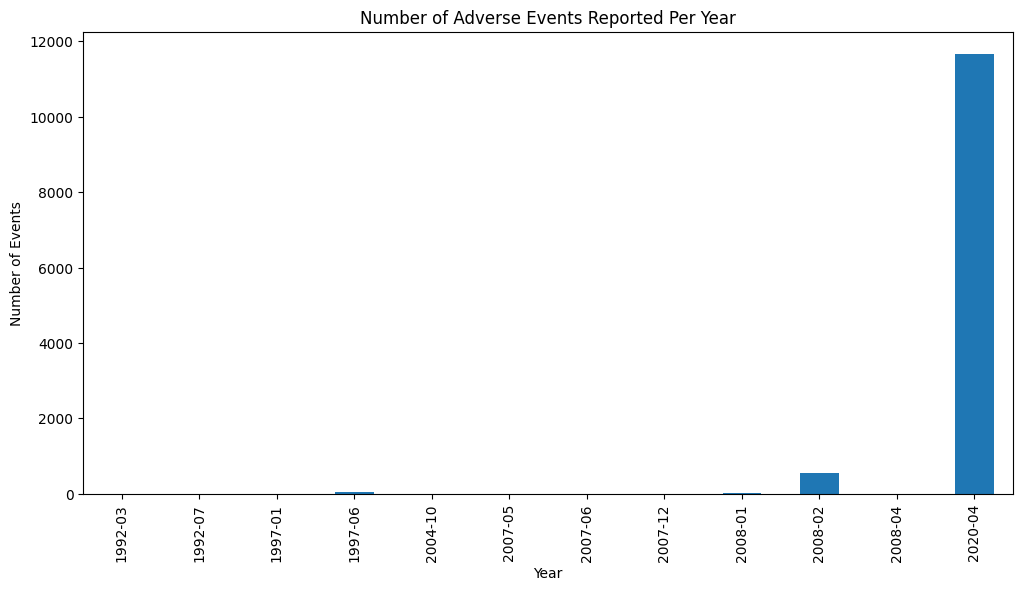

In [203]:
# Plotting Yearly Trend

events_per_year = df_final['year_month_received'].value_counts().sort_index()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
events_per_year.plot(kind='bar')
plt.title('Number of Adverse Events Reported Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

Yearly Trend Analysis:

This bar chart visualizes the number of adverse event reports aggregated by year.
A dramatic increase in adverse event reports is seen starting in 2008, peaking sharply in 2020.

Insight:
This spike could correspond to changes in FDA reporting policies, increased adoption of medical devices, or improvements in data reporting systems, particularly around 2020.


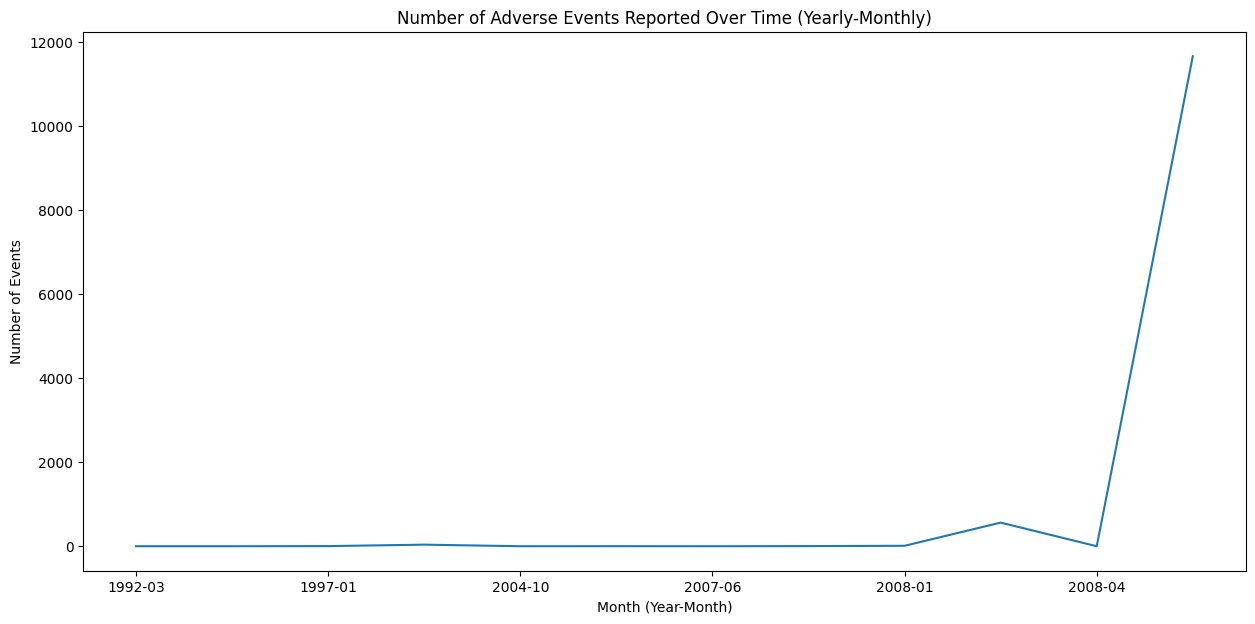

In [209]:
# Plotting Monthly Trend

events_per_month = df_final['year_month_received'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(15,7))
events_per_month.plot()
plt.title('Number of Adverse Events Reported Over Time (Yearly-Monthly)')
plt.xlabel('Month (Year-Month)')
plt.ylabel('Number of Events')
plt.show()

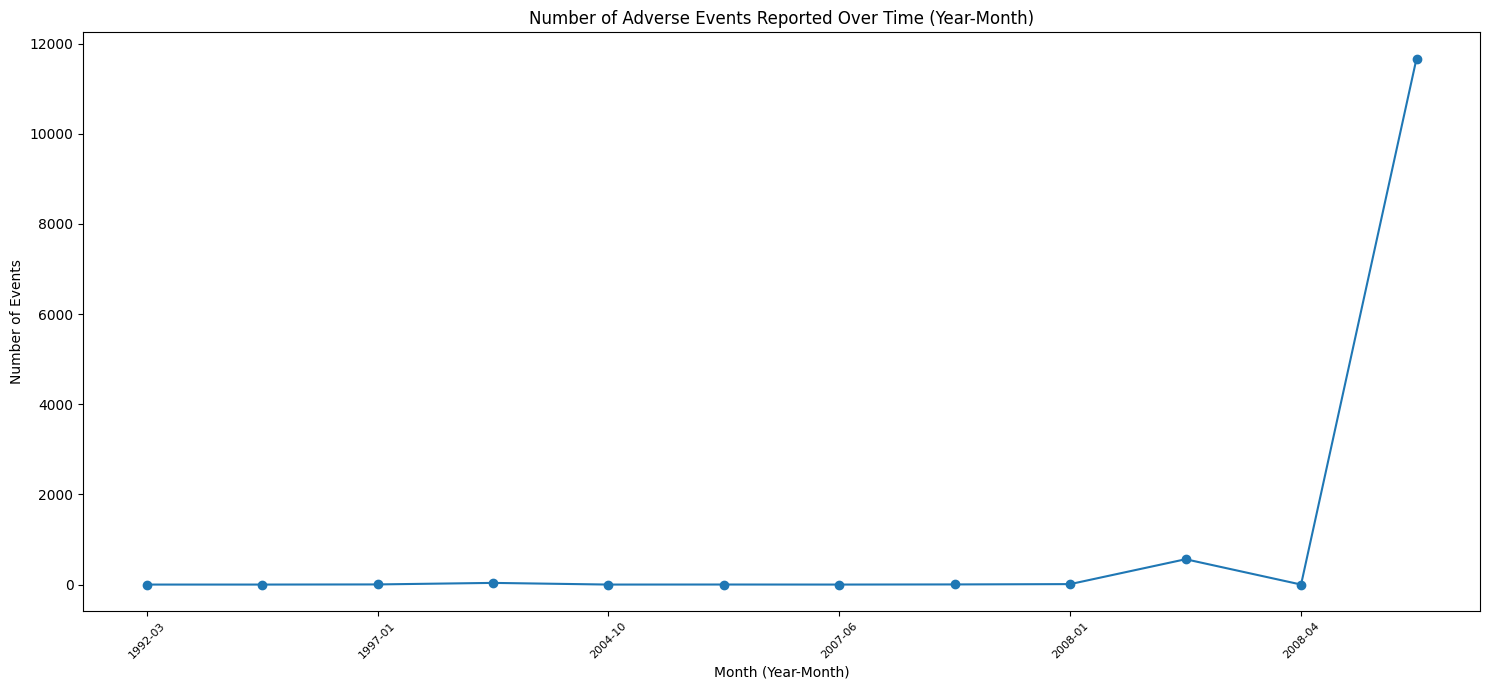

In [208]:
# Aggregating by Year-Month

plt.figure(figsize=(15, 7))
events_per_month.plot(kind='line', marker='o')
plt.title('Number of Adverse Events Reported Over Time (Year-Month)')
plt.xlabel('Month (Year-Month)')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, fontsize=8)  # Rotate and reduce font size for clarity
plt.tight_layout()
plt.show()


Year-Month Trend Analysis:

This line chart breaks down adverse events by both year and month (e.g., 2020-08).
There is a consistent rise starting from 2008, but the largest spike occurs in early 2020.
Between 1992 and 2008, the reports were minimal.
This chart helps identify specific months of peak reporting within the years.

Insight:
The 2020 spike aligns with the COVID-19 pandemic, which may have accelerated the use of medical devices or highlighted existing problems.
Actionable Insights:
Investigate the reasons behind the 2008 and 2020 spikes:
Were there specific device recalls?
Were there regulatory changes requiring stricter reporting?
Did new types of medical devices (e.g., ventilators) contribute to the spike in 2020?


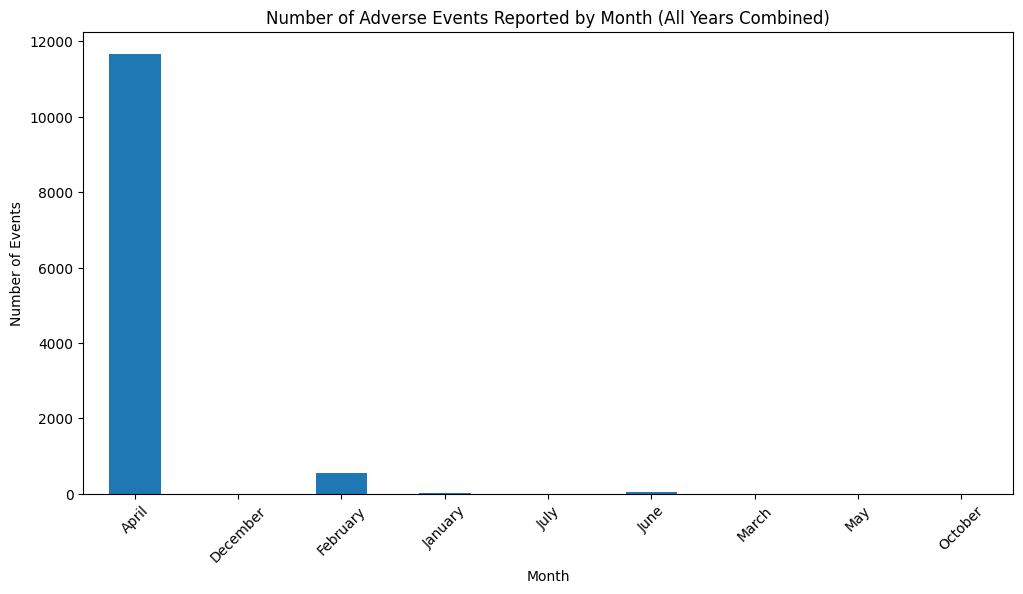

In [210]:
# Month-Only Analysis

# Extracting Month Name for Month-Only Analysis
df_final['month_only'] = df_final['date_received'].dt.month_name()  # Extract month name
# OR
# df_final['month_only'] = df_final['date_received'].dt.month  # Extract month number

# Grouping Events by Month Across All Years
events_per_month = df_final['month_only'].value_counts().sort_index()

# Plot Monthly Trend (Aggregated by Month)
plt.figure(figsize=(12, 6))
events_per_month.plot(kind='bar')
plt.title('Number of Adverse Events Reported by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

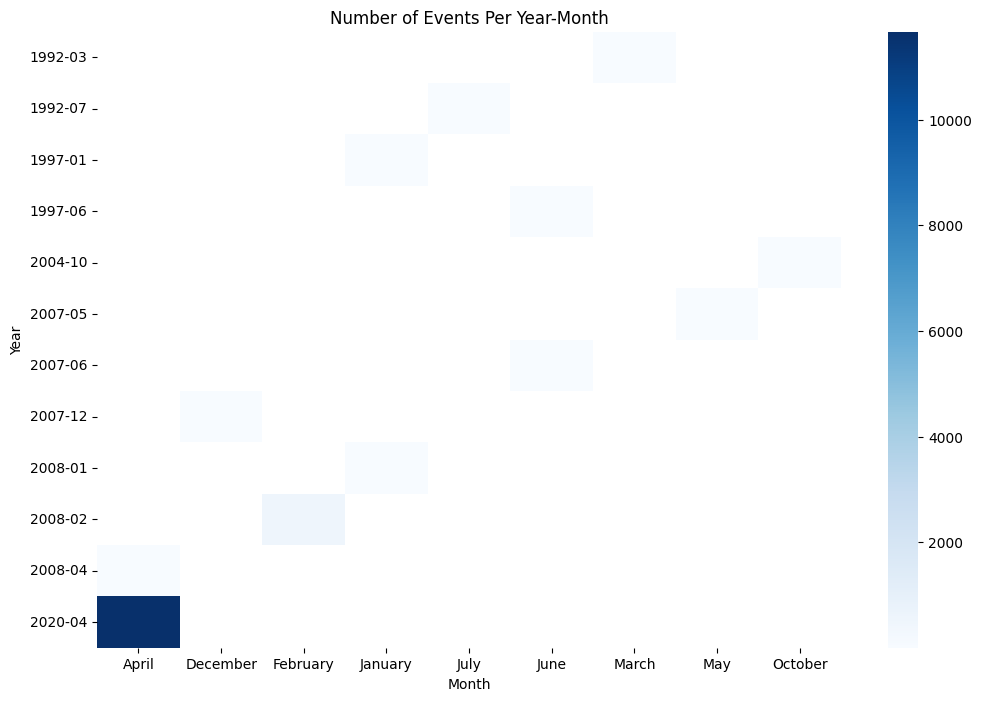

In [211]:
# Compare Months Across Years

# Group by year and month
year_month_data = df_final.groupby(['year_month_received', df_final['date_received'].dt.month_name()]).size().unstack()

# Plot heatmap for comparison
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(year_month_data, annot=False, cmap='Blues', cbar=True)
plt.title('Number of Events Per Year-Month')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

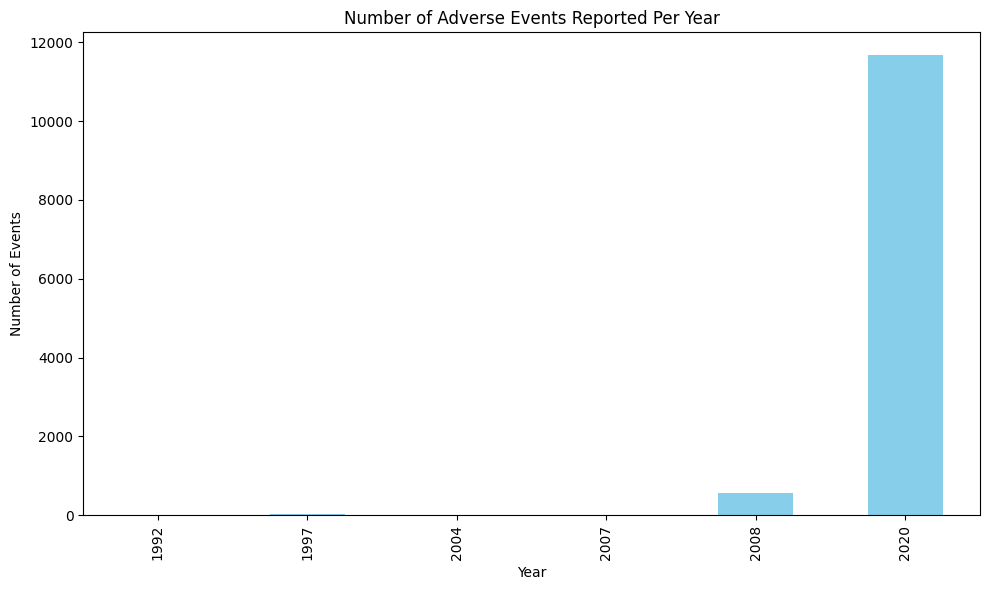

In [212]:
# Extracting Year and Month from the date_received column
df_final['year_received'] = pd.to_datetime(df_final['date_received']).dt.year
df_final['month_received'] = pd.to_datetime(df_final['date_received']).dt.to_period('M')

# Yearly trend
events_per_year = df_final['year_received'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
events_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Adverse Events Reported Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

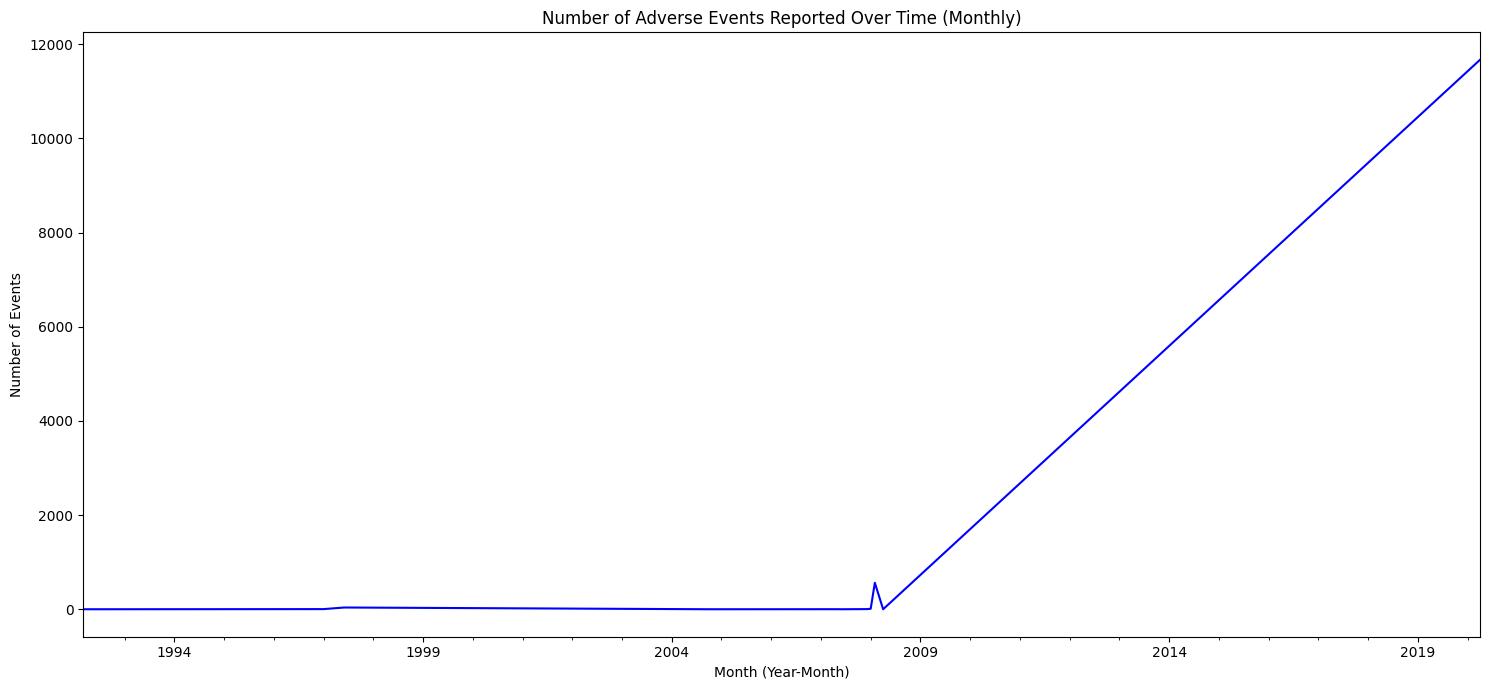

In [213]:
# Monthly trend
events_per_month = df_final['month_received'].value_counts().sort_index()
plt.figure(figsize=(15, 7))
events_per_month.plot(color='blue')
plt.title('Number of Adverse Events Reported Over Time (Monthly)')
plt.xlabel('Month (Year-Month)')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

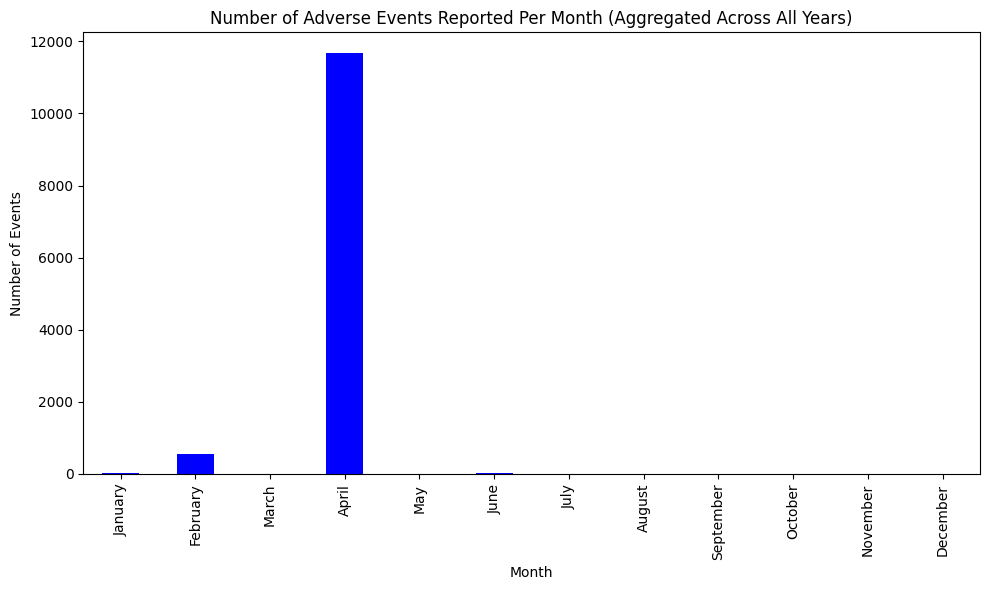

In [232]:
# MONTHLY TREND

# Extract the month name or number
df_final['month_name'] = df_final['date_received'].dt.month_name()  # For month names like January, February
# Alternatively, use this for numeric month representation:
# df_final['month_number'] = df_final['date_received'].dt.month

# Group data by month
events_per_month = df_final['month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])  # Reindex to ensure months are in order

# Plot the data
plt.figure(figsize=(10, 6))
events_per_month.plot(kind='bar', color='blue')
plt.title('Number of Adverse Events Reported Per Month (Aggregated Across All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

The spike in April 2020 is likely related to the reporting policies or external factors such as regulatory deadlines. Also, 2020 coincided with the COVID-19 pandemic, significantly impacting healthcare systems globally. This may have resulted in increased reporting of adverse events due to heightened surveillance, increased device usage (e.g., ventilators, glucose monitors), or pandemic-related reporting requirements.

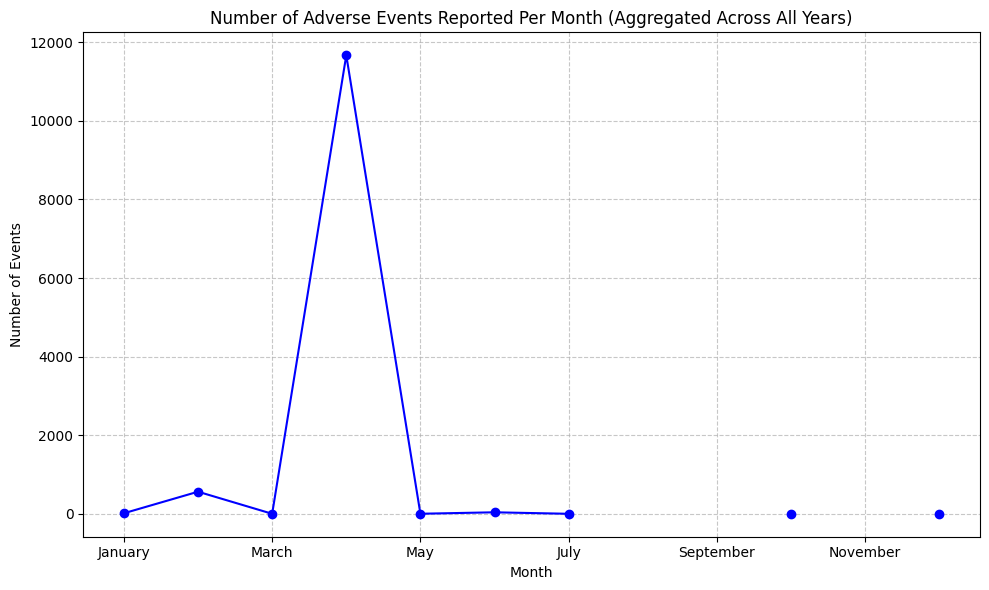

In [233]:
# Line Graph Showing Monthly Trends Across All Years

# Extract the month name or month number
df_final['month_name'] = df_final['date_received'].dt.month_name()

# Group by month and aggregate
events_per_month = df_final['month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])  # Ensures months are ordered correctly

# Plot as a line graph
plt.figure(figsize=(10, 6))
events_per_month.plot(kind='line', marker='o', color='blue')
plt.title('Number of Adverse Events Reported Per Month (Aggregated Across All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

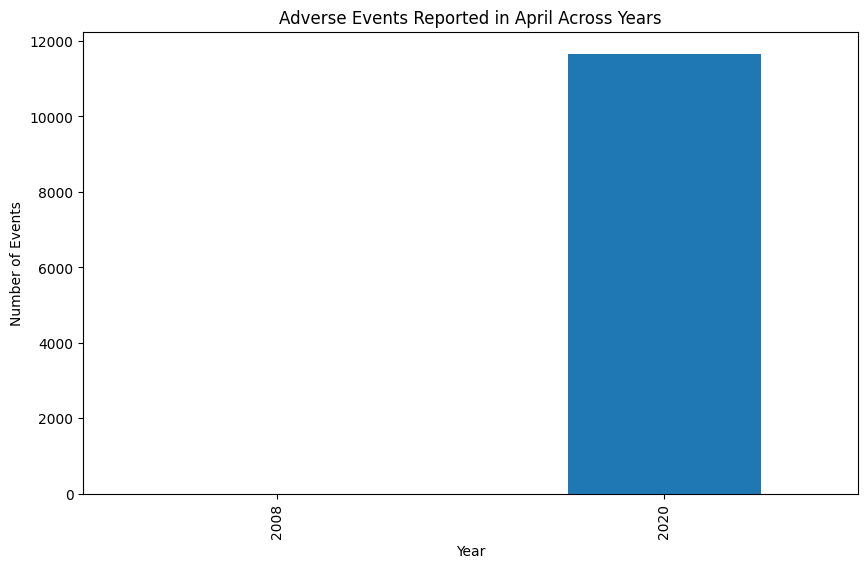

In [236]:
# Spike in April

april_trends = df_final[df_final['month_name'] == 'April']['year_received'].value_counts().sort_index()
april_trends.plot(kind='bar', figsize=(10, 6), title='Adverse Events Reported in April Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

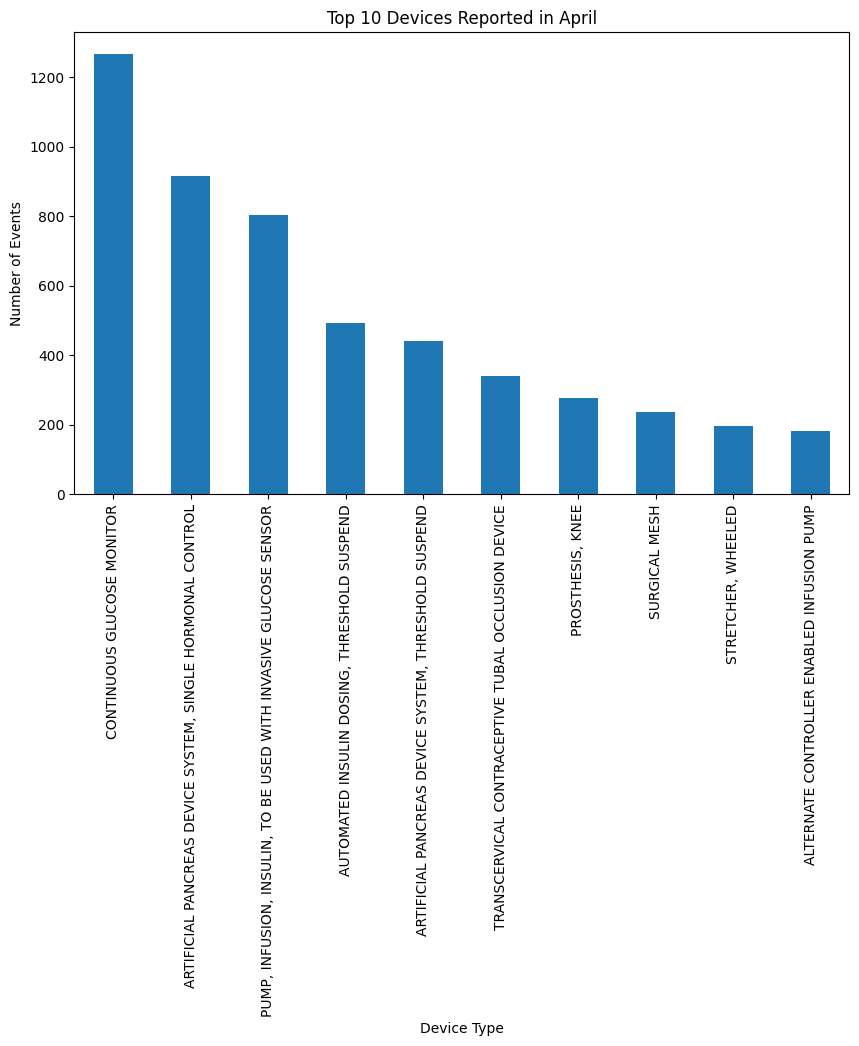

In [237]:
# Which devices or manufacturers are contributing most to the spike in April

april_devices = df_final[df_final['month_name'] == 'April']['device.generic_name'].value_counts().head(10)
april_devices.plot(kind='bar', figsize=(10, 6), title='Top 10 Devices Reported in April')
plt.xlabel('Device Type')
plt.ylabel('Number of Events')
plt.show()

###### Objective 2: Determining the Most Commonly Reported Device Types and Associated Problems

In [214]:
# Determining the Most Commonly Reported Device Types and Associated Problems

# Identify Top Device Types
top_device_types = df_final['device.generic_name'].value_counts().head(10)
print("Top 10 Device Types:")
print(top_device_types)

Top 10 Device Types:
device.generic_name
CONTINUOUS GLUCOSE MONITOR                                          1359
ARTIFICIAL PANCREAS DEVICE SYSTEM, SINGLE HORMONAL CONTROL           916
PUMP, INFUSION, INSULIN, TO BE USED WITH INVASIVE GLUCOSE SENSOR     804
AUTOMATED INSULIN DOSING, THRESHOLD SUSPEND                          493
ARTIFICIAL PANCREAS DEVICE SYSTEM, THRESHOLD SUSPEND                 441
TRANSCERVICAL CONTRACEPTIVE TUBAL OCCLUSION DEVICE                   341
PROSTHESIS, KNEE                                                     277
SURGICAL MESH                                                        236
STRETCHER, WHEELED                                                   196
ALTERNATE CONTROLLER ENABLED INFUSION PUMP                           182
Name: count, dtype: int64


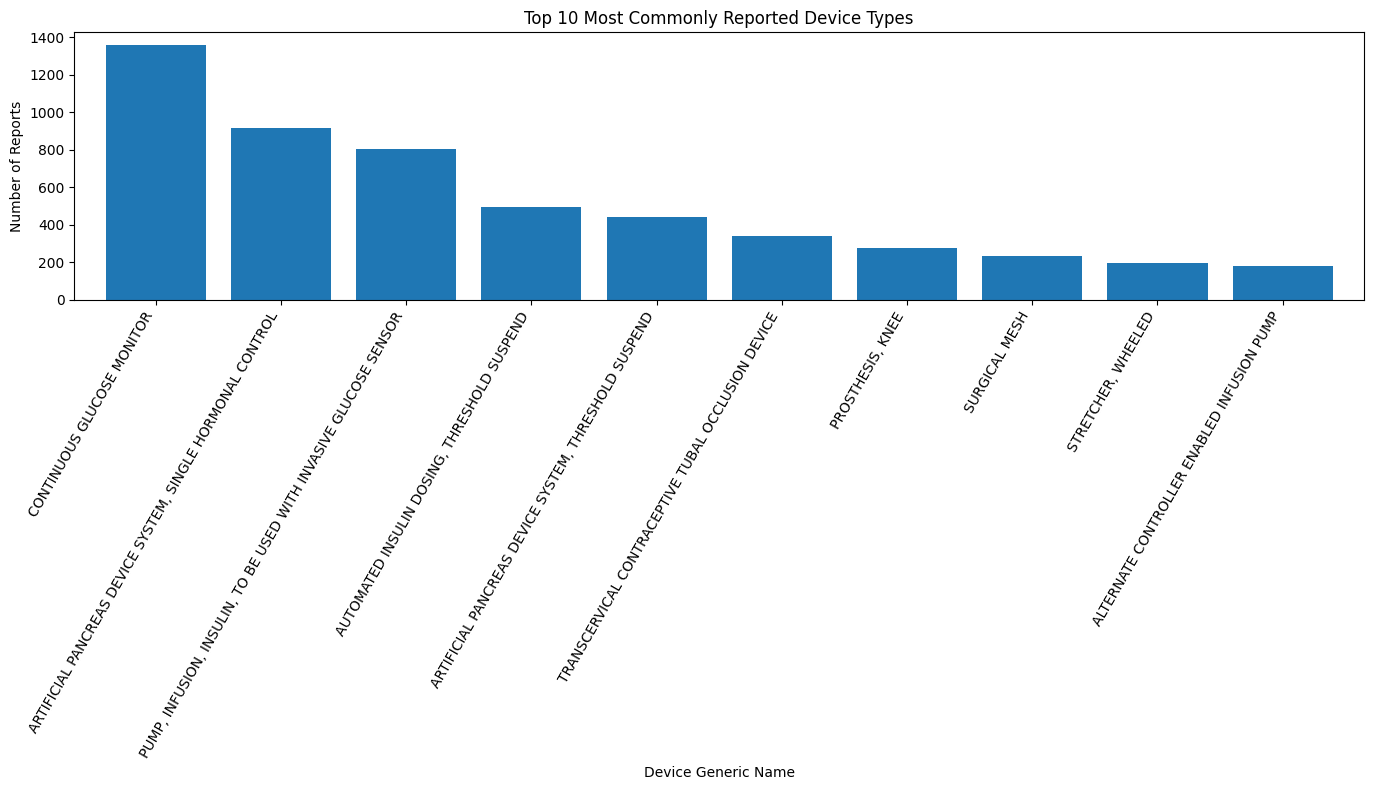

In [215]:
# Plotting Top Device Types

# MOST REPORTED DEVICES
plt.figure(figsize=(14,8))
top_device_types.plot(kind='bar', width=0.8)
plt.title('Top 10 Most Commonly Reported Device Types')
plt.xlabel('Device Generic Name')
plt.ylabel('Number of Reports')
plt.xticks(rotation=60, ha='right')  # Rotate labels at 60° and align them to the right
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

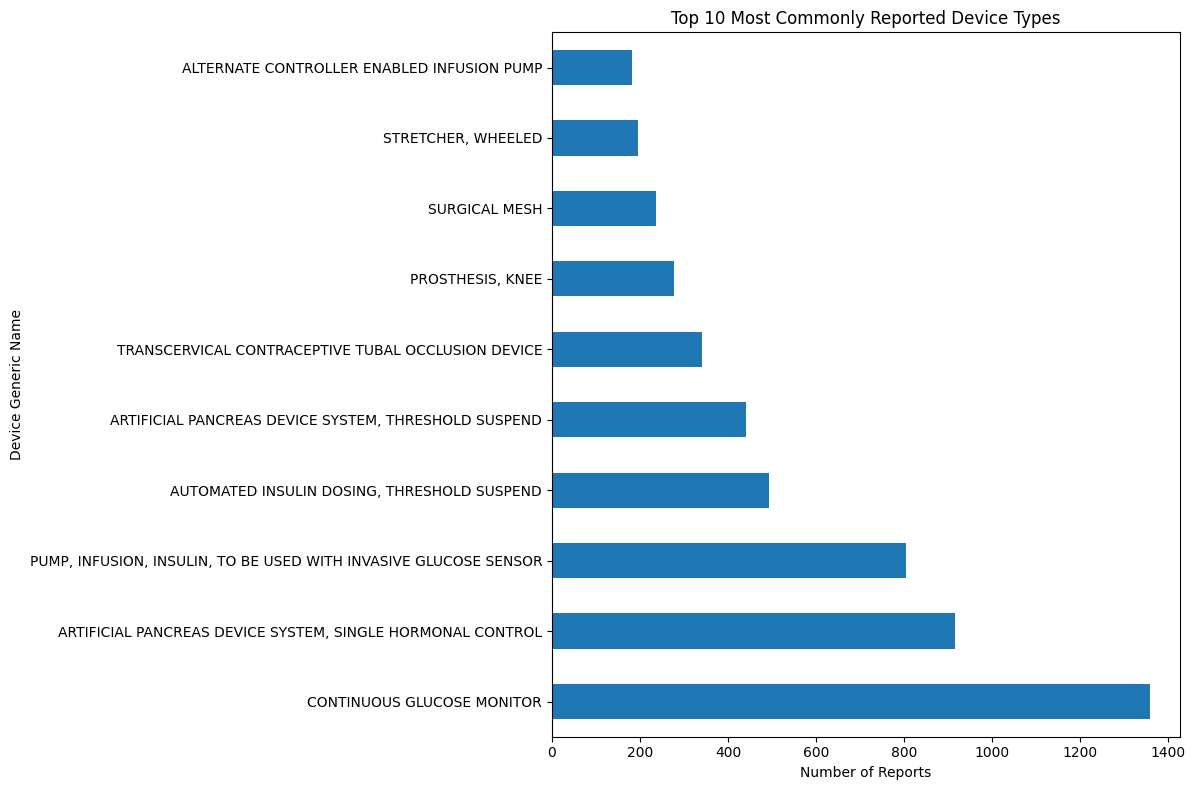

In [216]:
plt.figure(figsize=(12, 8))
top_device_types.plot(kind='barh')  # Horizontal bar chart
plt.title('Top 10 Most Commonly Reported Device Types')
plt.xlabel('Number of Reports')
plt.ylabel('Device Generic Name')
plt.tight_layout()
plt.show()

Continuous glucose monitors and insulin delivery systems were the most frequently reported devices. This may reflect widespread usage among diabetic patients and the potential challenges in device reliability or user interaction.

Devices with frequent adverse event reports, such as glucose monitors and insulin-related systems, might require increased scrutiny for post-market surveillance, particularly to identify common failure modes or user issues.

In [217]:
df_final['product_problems'].head(20)

,product_problems
0,Adverse Event Without Identified Device or Use...
1,Adverse Event Without Identified Device or Use...
3,Adverse Event Without Identified Device or Use...
4,Adverse Event Without Identified Device or Use...
5,Adverse Event Without Identified Device or Use...
6,Adverse Event Without Identified Device or Use...
7,"No Apparent Adverse Event, Patient Device Inte..."
8,"No Apparent Adverse Event, Patient Device Inte..."
9,"No Apparent Adverse Event, Patient Device Inte..."
10,Device Difficult to Program or Calibrate


In [218]:
# Identifying Top Associated Problems

# Assuming 'product_problems' contains the associated problems
# If 'product_problems' is a string of problems separated by commas, split them
df_final['product_problems_list'] = df_final['product_problems'].str.split(', ')

# Explode the list to count each problem separately
exploded_problems = df_final.explode('product_problems_list')

top_problems = exploded_problems['product_problems_list'].value_counts().head(10)
print("Top 10 Reported Product Problems:")
print(top_problems)

Top 10 Reported Product Problems:
product_problems_list
Adverse Event Without Identified Device or Use Problem    2086
Patient Device Interaction Problem                        1177
Insufficient Information                                   546
Wireless Communication Problem                             545
Fracture                                                   352
Break                                                      328
Mechanical Problem                                         312
Defective Device                                           290
No Device Output                                           282
Obstruction of Flow                                        253
Name: count, dtype: int64


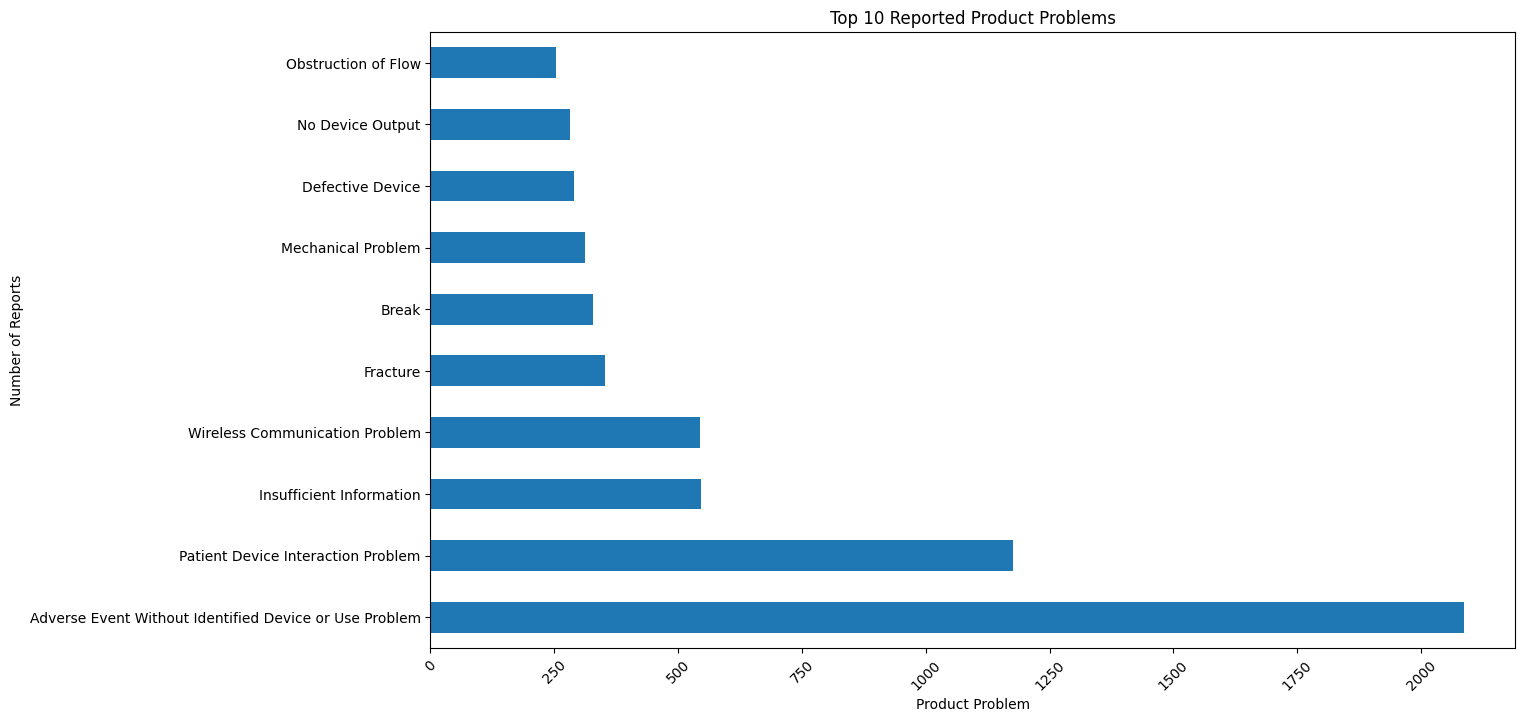

In [219]:
# Plotting Product Problems

# MOST REPORTED PROBLEMS

plt.figure(figsize=(14,8))
top_problems.plot(kind='barh')
plt.title('Top 10 Reported Product Problems')
plt.xlabel('Product Problem')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()

The largest category, "Adverse Event Without Identified Device or Use Problem," accounts for many reports. This highlights challenges attributing adverse events to specific devices, potentially indicating data reporting or documentation gaps.

This analysis shows the importance of improving data quality and reporting standards and focusing on patient training and device usability to mitigate adverse events.


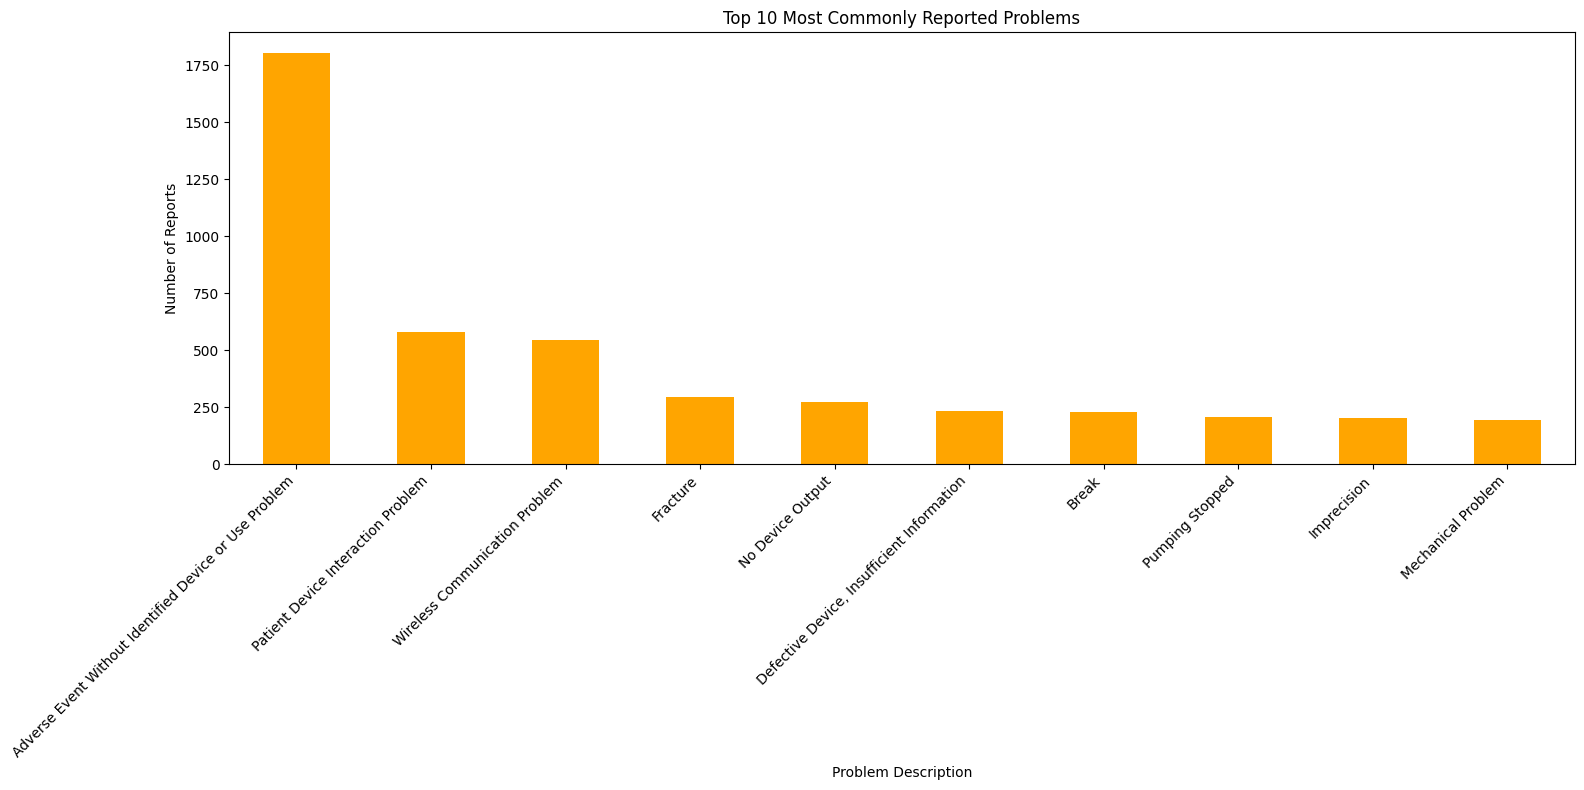

In [220]:
# Top 10 product problems
top_problems = df_final['product_problems'].value_counts().head(10)
plt.figure(figsize=(16, 8))
top_problems.plot(kind='bar', color='orange')
plt.title('Top 10 Most Commonly Reported Problems')
plt.xlabel('Problem Description')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###### Objective 3: Identifying Manufacturers with the Highest Number of Adverse Event Reports

In [221]:
# Identifying Manufacturers with the Highest Number of Adverse Event Reports

# Identify Top Manufacturers
top_manufacturers = df_final['device.manufacturer_d_name'].value_counts().head(10)
print("Top 10 Manufacturers by Number of Reports:")
print(top_manufacturers)

Top 10 Manufacturers by Number of Reports:
device.manufacturer_d_name
MEDTRONIC PUERTO RICO OPERATIONS CO.    2400
DEXCOM, INC.                            1180
TANDEM DIABETES CARE                     854
ZIMMER BIOMET, INC.                      387
STRYKER MEDICAL-KALAMAZOO                385
BOSTON SCIENTIFIC CORPORATION            362
BAYER PHARMA AG                          341
MPRI                                     284
DEPUY ORTHOPAEDICS INC US                261
DAVOL INC., SUB. C.R. BARD, INC.         236
Name: count, dtype: int64


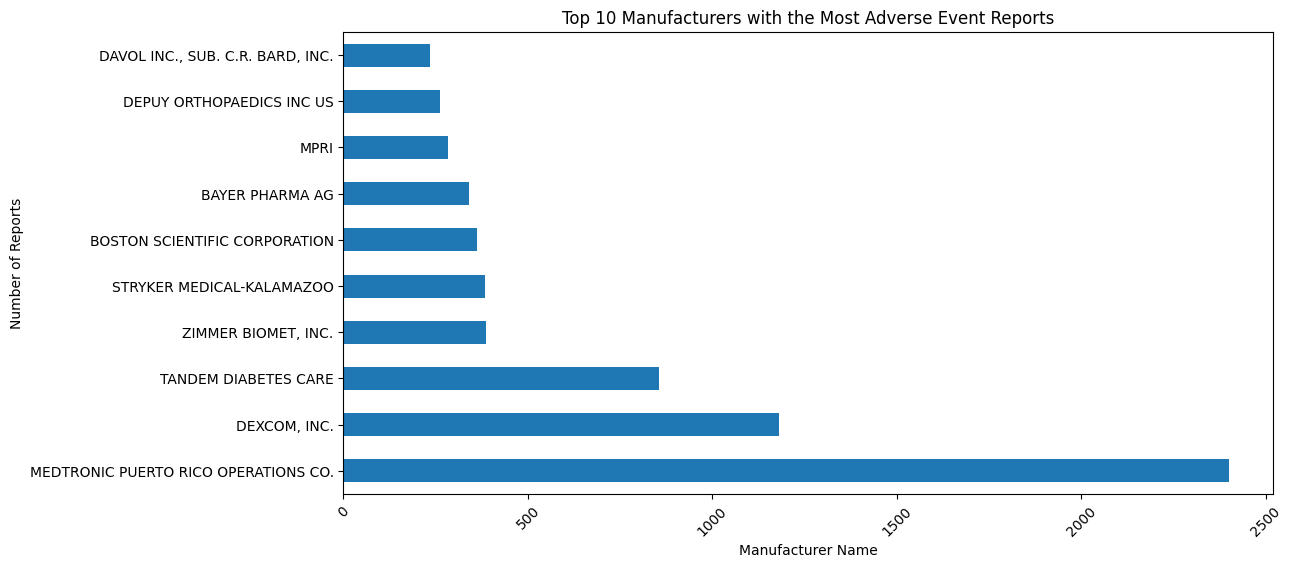

In [222]:
# Plotting

plt.figure(figsize=(12,6))
top_manufacturers.plot(kind='barh')
plt.title('Top 10 Manufacturers with the Most Adverse Event Reports')
plt.xlabel('Manufacturer Name')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()

Medtronic Puerto Rico Operations Co.:

This manufacturer has the highest adverse event reports, significantly outnumbering the others. A high number of reports does not necessarily mean that a manufacturer’s devices are more problematic. It could indicate that their devices are more widely used or that the company has a better system for capturing and reporting adverse events.


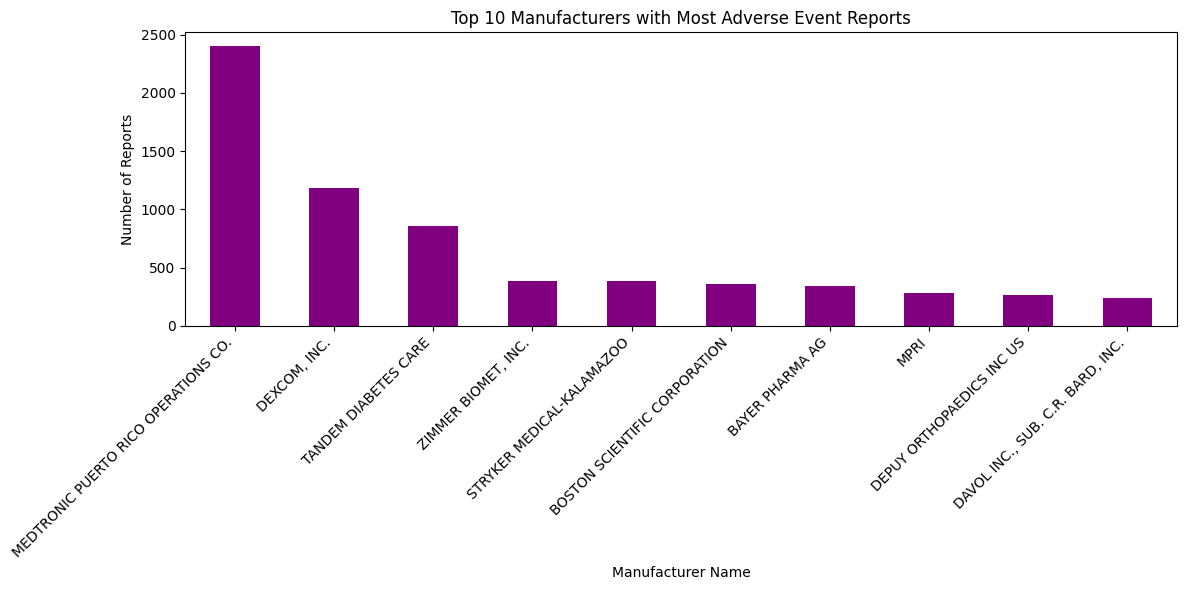

In [223]:
# Top 10 manufacturers
top_manufacturers = df_final['device.manufacturer_d_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_manufacturers.plot(kind='bar', color='purple')
plt.title('Top 10 Manufacturers with Most Adverse Event Reports')
plt.xlabel('Manufacturer Name')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###### Objective 4: Examine the Types of Adverse Events to Assess Their Severity

In [224]:
# Examine the Types of Adverse Events to Assess Their Severity

# Analyze Event Types
event_types_counts = df_final['event_type'].value_counts()
print("Event Types Counts:")
print(event_types_counts)

Event Types Counts:
event_type
malfunction           8231
injury                3946
death                  100
other                   11
no answer provided       6
Name: count, dtype: int64


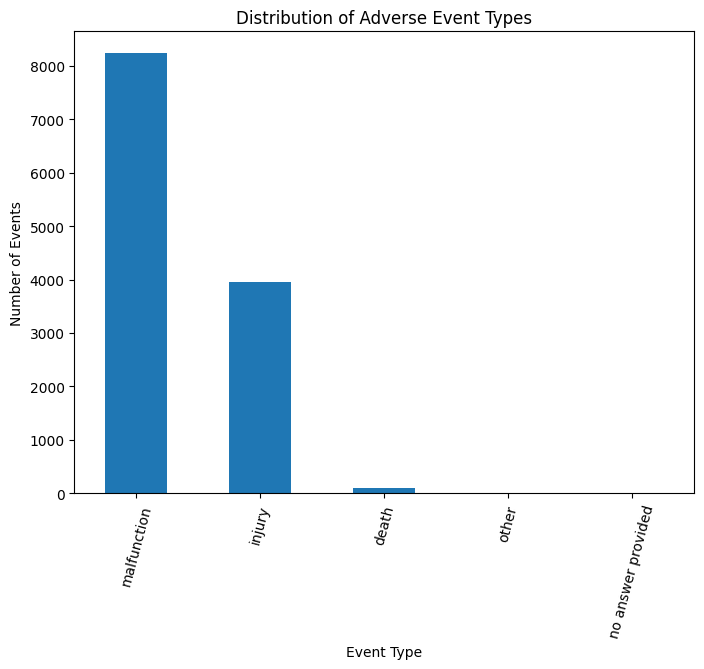

In [225]:
# Plotting

plt.figure(figsize=(8,6))
event_types_counts.plot(kind='bar')
plt.title('Distribution of Adverse Event Types')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=75)
plt.show()

Since malfunctions are the dominant issue, identifying the types of devices and common causes associated with these malfunctions is essential.

Event Severity Counts:
event_severity
Low        8231
Medium     3946
High        100
Unknown       6
Name: count, dtype: int64


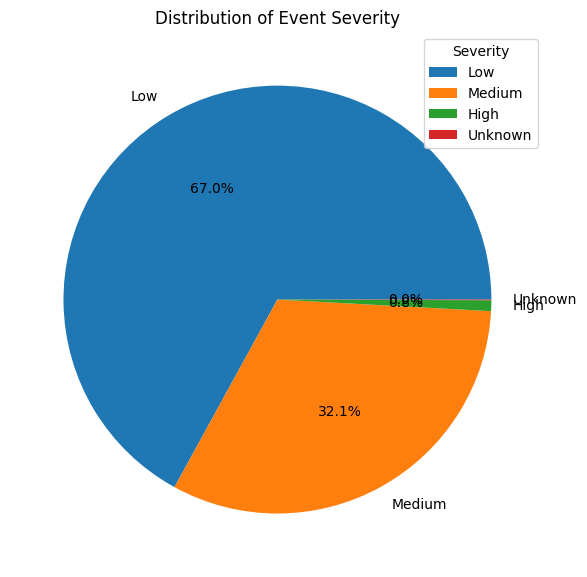

In [226]:
# Assessing Severity

# Creating a severity mapping
severity_mapping = {
    'death': 'High',
    'injury': 'Medium',
    'malfunction': 'Low',
    'no answer provided': 'Unknown',
    'invalid data': 'Unknown'
}

df_final['event_severity'] = df_final['event_type'].map(severity_mapping)

# Analyzing severity distribution
severity_counts = df_final['event_severity'].value_counts()
print("Event Severity Counts:")
print(severity_counts)

# Plotting
plt.figure(figsize=(6,6))
severity_counts.plot(kind='pie', autopct='%1.1f%%', legend=True)
plt.title('Distribution of Event Severity')
plt.ylabel('')
plt.legend(title='Severity', loc='upper right')  # Customize the legend location
plt.tight_layout()
plt.show()

In [227]:
# Severity by Device Type

# Cross-tabulation of device type and severity
severity_by_device = pd.crosstab(df_final['device.generic_name'], df_final['event_severity'])
print(severity_by_device.head(10))  # Display first 10 rows

event_severity          High  Low  Medium  Unknown
device.generic_name                               
2 EYE TIEMAAN CATHETER     0    3       0        0
74DQX                      0    2       0        0
74LOX                      0    4       0        0
74MAF                      0    4       0        0
74MCX                      0    4       0        0
78FKX                      0    2       0        0
80FPA                      0    0       2        0
80FRN                      0    3       4        0
868.5440                   2    0       0        0
87JDI                      0    0       2        0


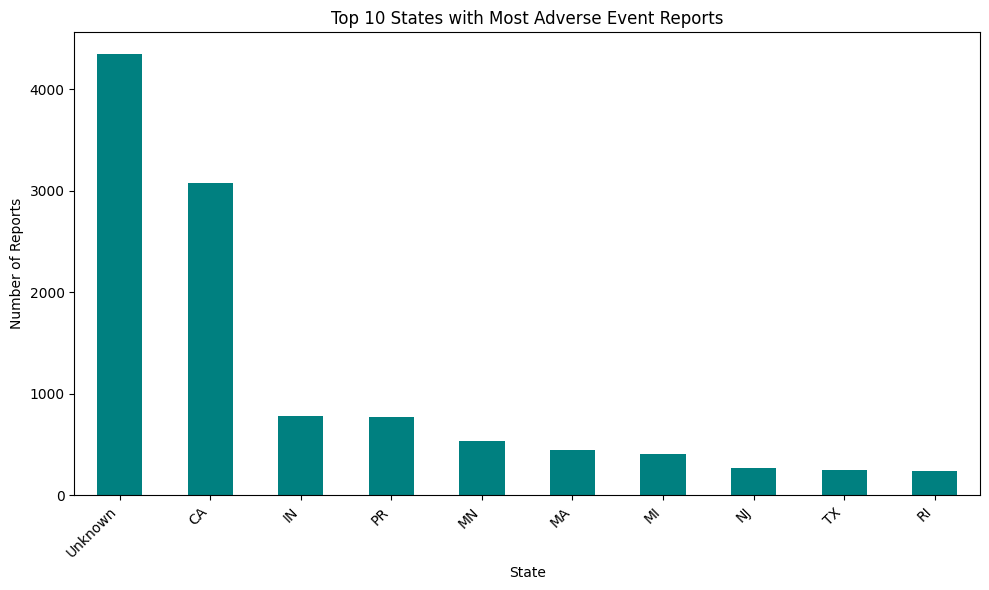

In [228]:
# Geographic Patterns (State or Country)

# Reports by state
state_counts = df_final['device.manufacturer_d_state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='teal')
plt.title('Top 10 States with Most Adverse Event Reports')
plt.xlabel('State')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The highest number of adverse event reports are from an "Unknown" state. This highlights incomplete or missing data in the reporting process, which could hinder geographical analysis.

California reports the second-highest number of events, likely due to its size, population, and concentration of medical device manufacturers and healthcare facilities.

Efforts could be directed toward improving reporting completeness (reducing "Unknown") and understanding why certain states have more incidents, whether due to manufacturing, use, or other factors.


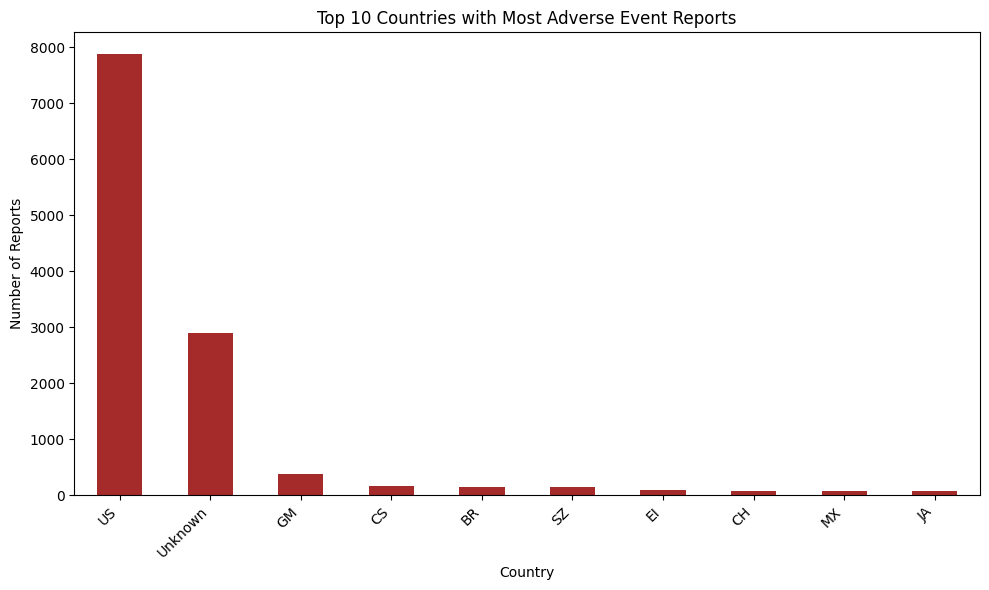

In [229]:
# Reports by country
country_counts = df_final['device.manufacturer_d_country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='brown')
plt.title('Top 10 Countries with Most Adverse Event Reports')
plt.xlabel('Country')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most adverse event reports originate from the US, reflecting its extensive medical device usage and reporting requirements. A significant portion of reports are attributed to "Unknown," suggesting incomplete geographic data in reporting

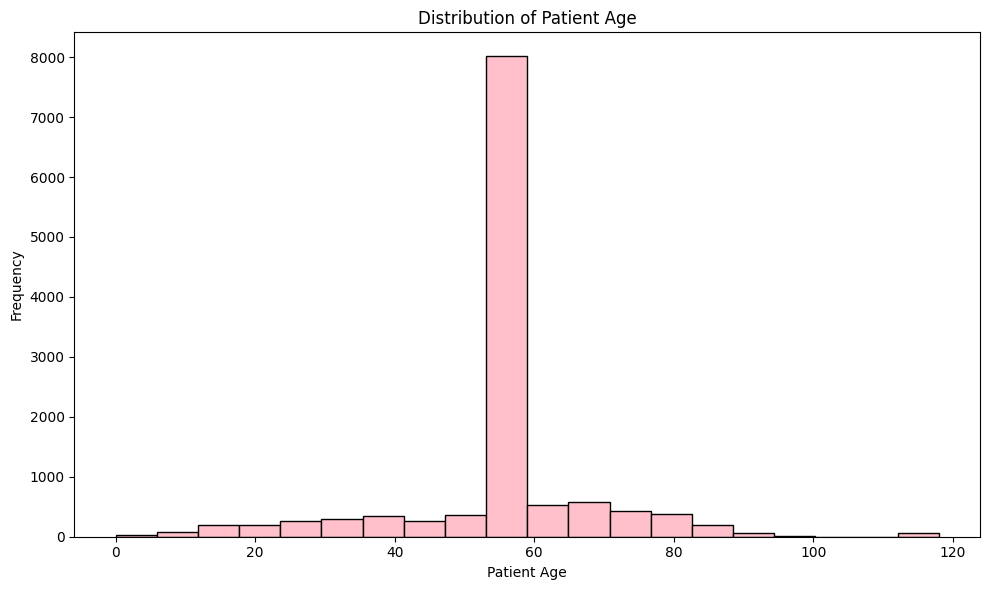

In [230]:
# Patient Demographics

# Patient age distribution
plt.figure(figsize=(10, 6))
df_final['patient.patient_age'].plot(kind='hist', bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most adverse event reports involve patients around 60 years of age, although there is a wide range of ages. This suggests that older adults are the primary users of medical devices.


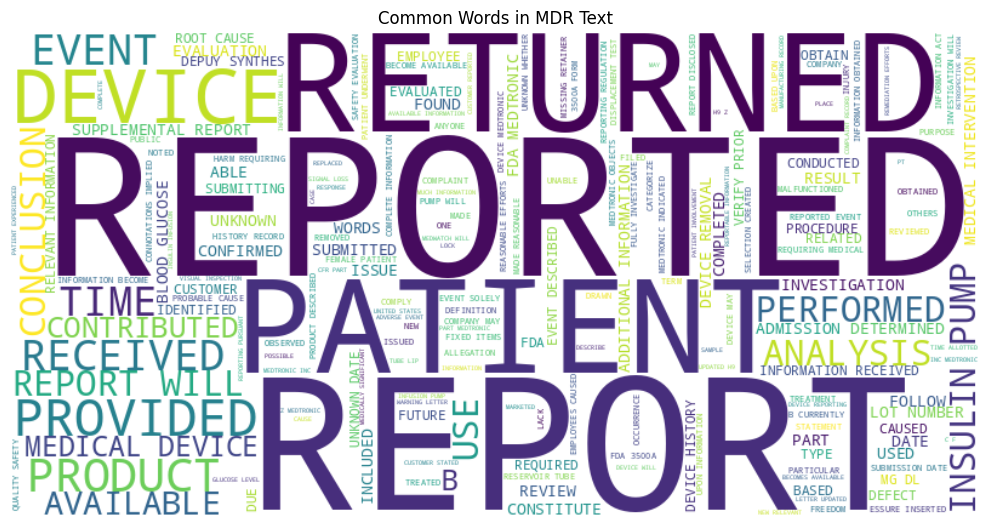

In [231]:
# Text Analysis on MDR Text

from wordcloud import WordCloud

# Generate a word cloud for MDR text
text_data = ' '.join(df_final['mdr_text.text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in MDR Text')
plt.tight_layout()
plt.show()